# Environment setup & graphical parameters

In [1]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

%pylab inline

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Load datasets

In [2]:
# Load datasets

data = pd.read_csv('data/WRK_seattleBuilding.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3132 non-null   int64  
 1   DataYear                         3132 non-null   int64  
 2   BuildingType                     3132 non-null   object 
 3   PrimaryPropertyType              3132 non-null   object 
 4   Address                          3132 non-null   object 
 5   ZipCode                          3132 non-null   float64
 6   CouncilDistrictCode              3132 non-null   int64  
 7   Neighborhood                     3132 non-null   object 
 8   Latitude                         3132 non-null   float64
 9   Longitude                        3132 non-null   float64
 10  YearBuilt                        3132 non-null   int64  
 11  NumberofBuildings                3132 non-null   float64
 12  NumberofFloors      

In [3]:
data[['OSEBuildingID',
      'DataYear',
      'CouncilDistrictCode',
      'YearBuilt']] = data[['OSEBuildingID',
                            'DataYear',
                            'CouncilDistrictCode',
                            'YearBuilt']].astype('object')

In [4]:
data[['PropertyGFATotal',
      'PropertyGFAParking',
      'PropertyGFABuilding(s)']] = data[['PropertyGFATotal',
                                         'PropertyGFAParking',
                                         'PropertyGFABuilding(s)']].\
                                            astype('float')

In [5]:
data.sample(10)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Address,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
1699,247,2016,Nonresidential COS,Distribution Center,3613 4th Ave S,98134.0,2,GREATER DUWAMISH,47.571990,-122.328110,1924,1.0,2.0,179161.0,0.0,179161.0,Distribution Center,117476.0,Office,37321.0,Other,25543.0,NaN,52.200001,156.300003,9436408.000,0.0,8772104.0,664302.0,96.43,0.54
2188,19858,2016,NonResidential,Mixed Use Property,823 3rd Avenue,98104.0,7,DOWNTOWN,47.604270,-122.333850,1978,1.0,2.0,38539.0,12379.0,26160.0,Retail,15549.0,Parking,12379.0,Office,10611.0,55.0,83.599998,262.399994,2186018.500,0.0,2186018.0,0.0,15.24,0.40
114,200,2015,NonResidential,Other,11027 MERIDIAN AVE N,98133.0,5,NORTHWEST,47.709529,-122.334658,1996,1.0,3.0,55442.0,0.0,55442.0,Office,28636.0,Parking,15385.0,Health,8644.0,74.0,82.900000,188.800000,3091559.000,0.0,1814177.0,1277457.0,80.49,1.31
1869,482,2016,NonResidential,Large Office,320 Westlake Ave. N.,98109.0,7,LAKE UNION,47.621310,-122.338140,2006,1.0,6.0,303103.0,109905.0,193198.0,Office,178628.0,Parking,99368.0,Office,6015.0,97.0,40.700001,123.699997,7519466.500,0.0,7147457.0,372009.0,69.59,0.23
1954,599,2016,NonResidential,Refrigerated Warehouse,4601 6th Ave S,98108.0,2,GREATER DUWAMISH,47.561580,-122.327540,1971,1.0,1.0,76354.0,0.0,76354.0,Refrigerated Warehouse,76486.0,No information,0.0,No information,0.0,70.0,37.200001,116.400002,2843033.500,0.0,2832924.0,10109.0,20.29,0.27
1030,23299,2015,NonResidential,Small- and Mid-Sized Office,700 9TH AVE,98104.0,3,EAST,47.606522,-122.325287,1970,1.0,7.0,54372.0,20824.0,33548.0,Office,54372.0,Parking,15000.0,No information,0.0,90.0,28.800000,90.300000,1563640.000,0.0,1563705.0,0.0,10.90,0.08
34,54,2015,NonResidential,Education,8200 WALLINGFORD AVE N,98103.0,6,NORTHWEST,47.688948,-122.336162,1954,1.0,3.0,175015.0,0.0,175015.0,Education,175015.0,No information,0.0,No information,0.0,95.0,40.500000,74.600000,7080118.000,0.0,2694187.0,4386042.0,251.72,1.37
2533,22804,2016,NonResidential,Small- and Mid-Sized Office,2611 NE 125th St,98125.0,5,NORTH,47.719000,-122.299660,1931,1.0,2.0,37500.0,0.0,37500.0,Office,37500.0,No information,0.0,No information,0.0,58.0,59.599998,152.600006,2235765.500,0.0,1614256.0,621509.0,44.26,1.18
1194,24591,2015,NonResidential,Small- and Mid-Sized Office,2724 1ST AVE S,98134.0,2,GREATER DUWAMISH,47.578956,-122.333667,1926,1.0,1.0,20460.0,0.0,20460.0,Office,20460.0,No information,0.0,No information,0.0,1.0,150.900000,473.800000,3087318.000,0.0,3087446.0,0.0,21.52,0.40
2591,23418,2016,NonResidential,Small- and Mid-Sized Office,"815 S Weller St,",98104.0,2,DOWNTOWN,47.597270,-122.321960,1989,1.0,2.0,23472.0,0.0,23472.0,Office,20695.0,Other,1065.0,Retail,945.0,NaN,71.599998,154.699997,1625308.625,0.0,864104.0,761205.0,46.45,1.98


# 1. Exploratory analysis

## Shape Analysis

In [6]:
# Create a copy of orginal dataframe
df = data.copy()

In [7]:
df.shape

(3132, 31)

In [8]:
df.dtypes.value_counts()

float64    20
object     11
dtype: int64

<AxesSubplot:>

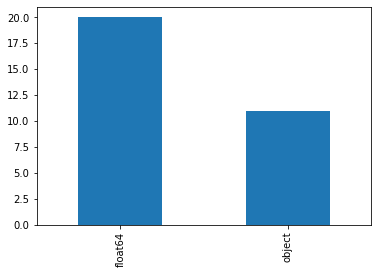

In [9]:
df.dtypes.value_counts().plot(kind='bar')

<AxesSubplot:>

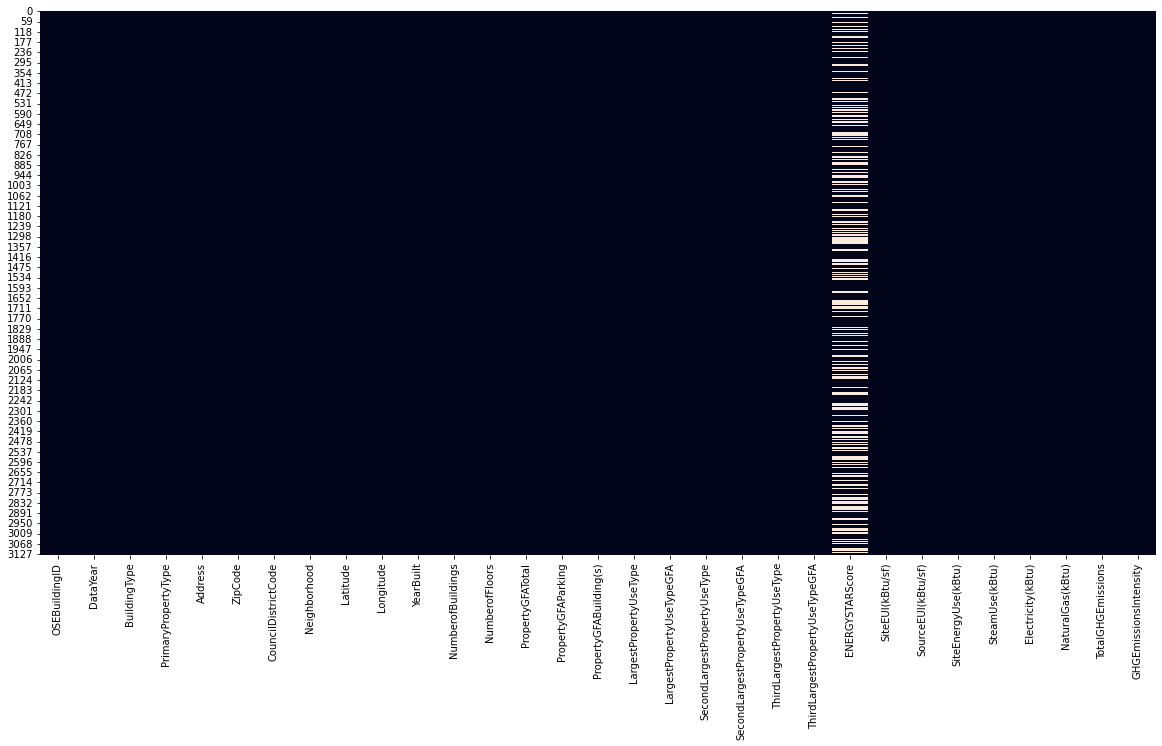

In [10]:
# Visualise Nan values
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cbar=False)

In [11]:
(df.isna().sum()).sort_values(ascending=True)

OSEBuildingID                         0
NaturalGas(kBtu)                      0
Electricity(kBtu)                     0
SteamUse(kBtu)                        0
SiteEnergyUse(kBtu)                   0
SourceEUI(kBtu/sf)                    0
SiteEUI(kBtu/sf)                      0
ThirdLargestPropertyUseTypeGFA        0
ThirdLargestPropertyUseType           0
SecondLargestPropertyUseTypeGFA       0
SecondLargestPropertyUseType          0
LargestPropertyUseTypeGFA             0
LargestPropertyUseType                0
TotalGHGEmissions                     0
PropertyGFABuilding(s)                0
PropertyGFATotal                      0
NumberofFloors                        0
NumberofBuildings                     0
YearBuilt                             0
Longitude                             0
Latitude                              0
Neighborhood                          0
CouncilDistrictCode                   0
ZipCode                               0
Address                               0


As specify in the subject, we can not use some variables in the dataset so I decided to calculate other variable with them to keep information that are interesting without sharing confidentiel info

SoureEUI and SiteEUI, I will calculate the median for each LargestPropertyUseType as done here https://www.energystar.gov/buildings/benchmark/understand_metrics/what_eui

and for Energy Uses features I will calculate the proportion per building instead of using the exact number.

In [12]:
#Median per group calculation

df['median_SourceEUI(kBtu/sf)'] = df.groupby('LargestPropertyUseType')['SourceEUI(kBtu/sf)'].transform('median')
df['median_SiteEUI(kBtu/sf)'] = df.groupby('LargestPropertyUseType')['SiteEUI(kBtu/sf)'].transform('median')

In [13]:
# Proportion calculation

df['p_NaturalGas'] = round(df['NaturalGas(kBtu)'] / df['SiteEnergyUse(kBtu)'], 2)
df['p_Electricity'] = round(df['Electricity(kBtu)'] / df['SiteEnergyUse(kBtu)'], 2)
df['p_SteamUse'] = round(df['SteamUse(kBtu)'] / df['SiteEnergyUse(kBtu)'], 2)

In [14]:
# Description of new variables

new_variable = ['p_NaturalGas', 'p_Electricity', 'p_SteamUse']

df[new_variable].describe()

,p_NaturalGas,p_Electricity,p_SteamUse
count,3132.000000,3132.000000,3132.000000
mean,0.276306,0.701204,0.020801
std,0.264142,0.262775,0.090151
min,0.000000,0.000000,0.000000
25%,0.000000,0.490000,0.000000
50%,0.230000,0.710000,0.000000
75%,0.490000,1.000000,0.000000
max,1.000000,1.000000,0.830000


In [15]:
# Drop confidentiel Categories & unnecessary for exploration
confidentiel_variable = ['NaturalGas(kBtu)',
                         'Electricity(kBtu)',
                         'SteamUse(kBtu)',
                         'SourceEUI(kBtu/sf)',
                         'SiteEUI(kBtu/sf)',
                         'GHGEmissionsIntensity']

df.drop(confidentiel_variable, axis=1, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3132 non-null   object 
 1   DataYear                         3132 non-null   object 
 2   BuildingType                     3132 non-null   object 
 3   PrimaryPropertyType              3132 non-null   object 
 4   Address                          3132 non-null   object 
 5   ZipCode                          3132 non-null   float64
 6   CouncilDistrictCode              3132 non-null   object 
 7   Neighborhood                     3132 non-null   object 
 8   Latitude                         3132 non-null   float64
 9   Longitude                        3132 non-null   float64
 10  YearBuilt                        3132 non-null   object 
 11  NumberofBuildings                3132 non-null   float64
 12  NumberofFloors      

## BackGround analysis

### 1. Targets visualisation

In [17]:
# Describtion of target variable

target = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']

df[target].describe()

,SiteEnergyUse(kBtu),TotalGHGEmissions
count,3.132000e+03,3132.000000
mean,7.881682e+06,170.828503
std,2.446596e+07,608.072957
min,1.144100e+04,0.080000
25%,1.242800e+06,19.805000
50%,2.498912e+06,49.105000
75%,6.797558e+06,137.170000
max,8.739237e+08,12307.160000


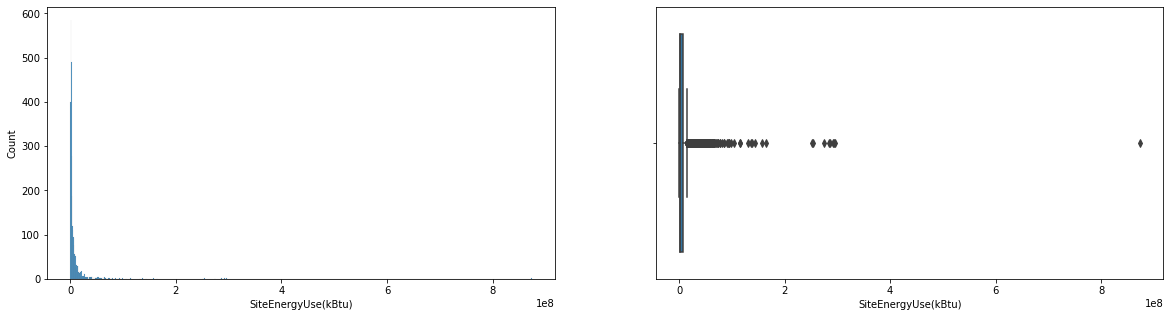

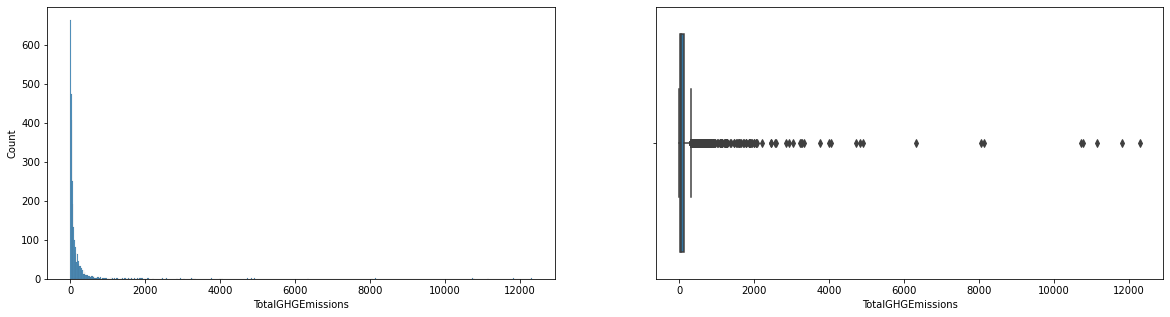

In [18]:
# Histogram of target

for col in target:
    fig = plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(x=df[col], data=df)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], data=df)

Target variables are lognormal distributed with few but still possible high values. I will log (natural one) targets to evaluate the shape.

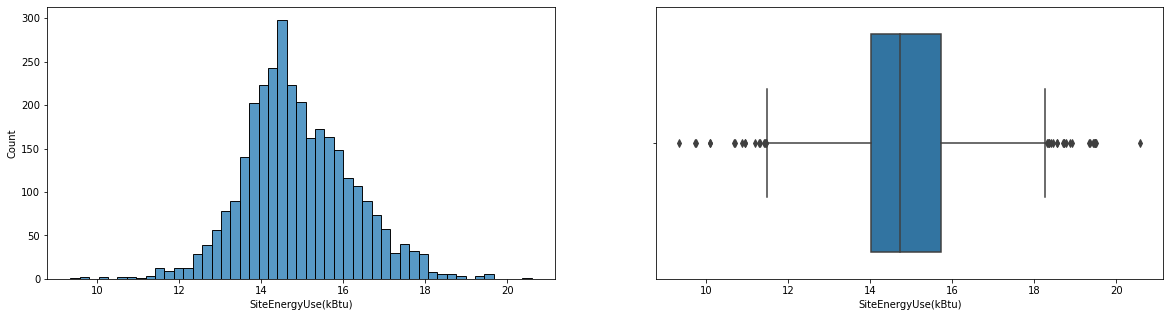

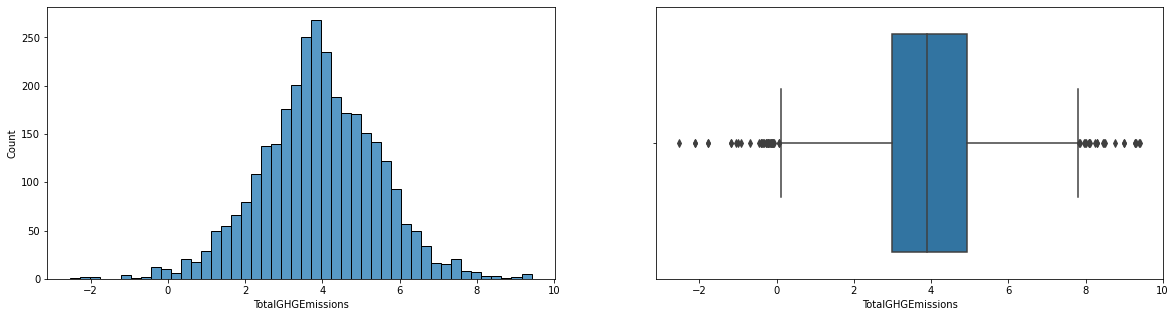

In [19]:
# Histogram of log(target)

for col in target:
    fig = plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(x=np.log(df[col]), data=df)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=np.log(df[col]), data=df)

-> until the end of the study I will use the log transformed shape of targets

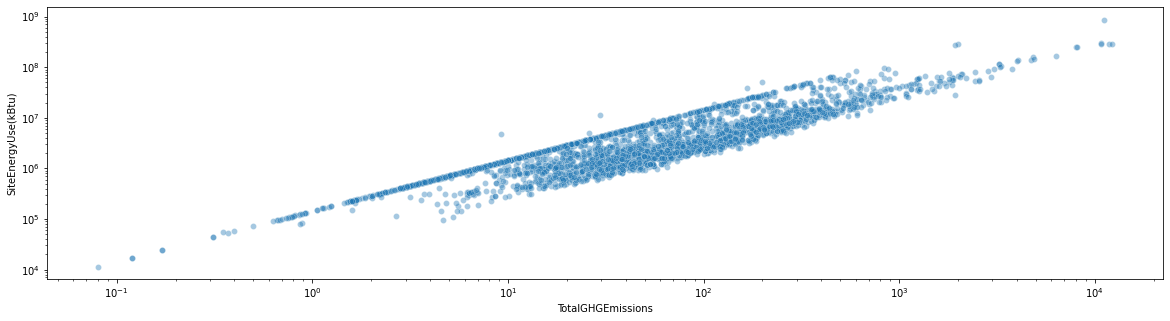

In [20]:
# Correlation between tagrgets

fig = plt.figure(figsize=(20, 5))

ax = sns.scatterplot(y=df['SiteEnergyUse(kBtu)'],
                     x=df['TotalGHGEmissions'],
                     alpha=0.4,
                     data=df)
ax.set_yscale('log')
ax.set_xscale('log')

In [21]:
# Calculate pearson coefficient and p-value

pearson_coef, p_value = stats.spearmanr(np.array(df['SiteEnergyUse(kBtu)']),
                                        np.array(df['TotalGHGEmissions']))

print("The pearson Correlation Coefficient is", pearson_coef,
      " with a P-value of P =", p_value)

The pearson Correlation Coefficient is 0.8650970012206517  with a P-value of P = 0.0


The two targets a statisticaly correlated with a pearson R of 0.86. Probably that during modelisation the same model will have the same performance on each values. 

### 2. Continous features

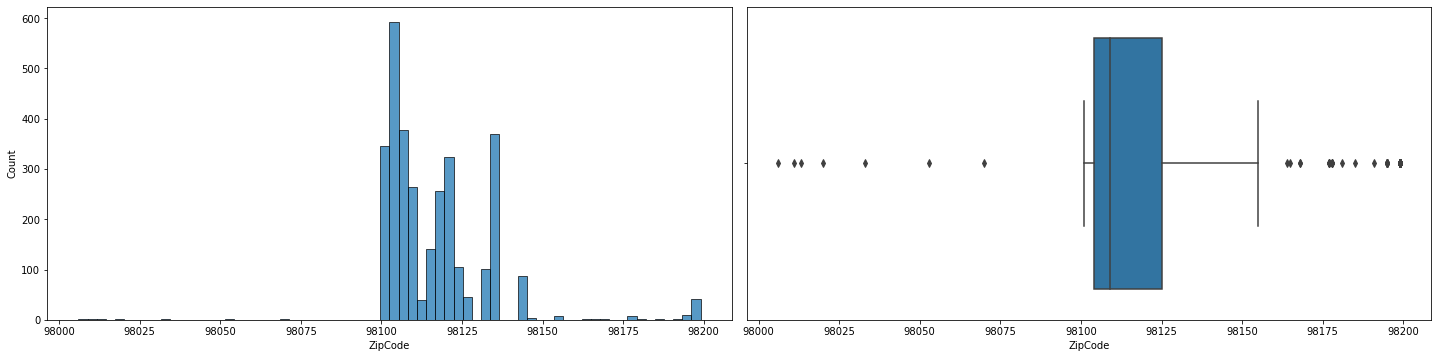

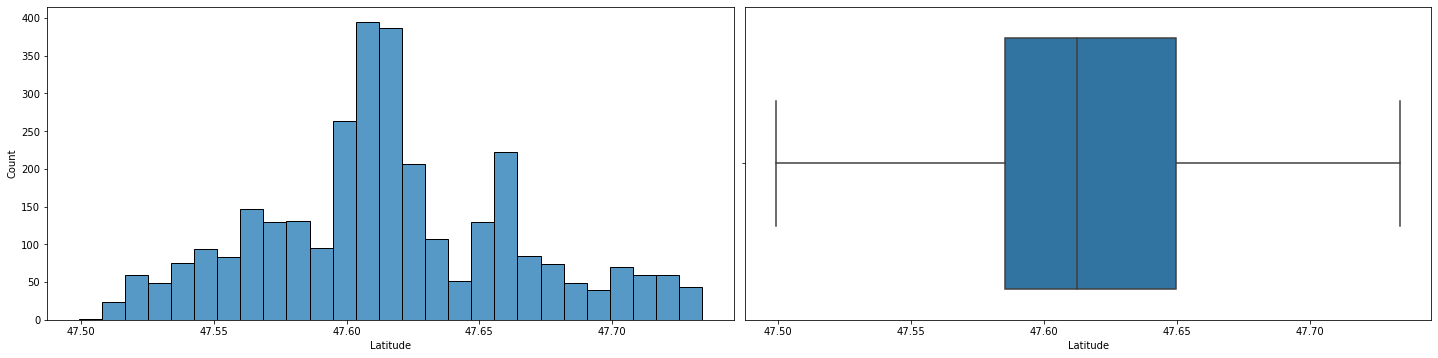

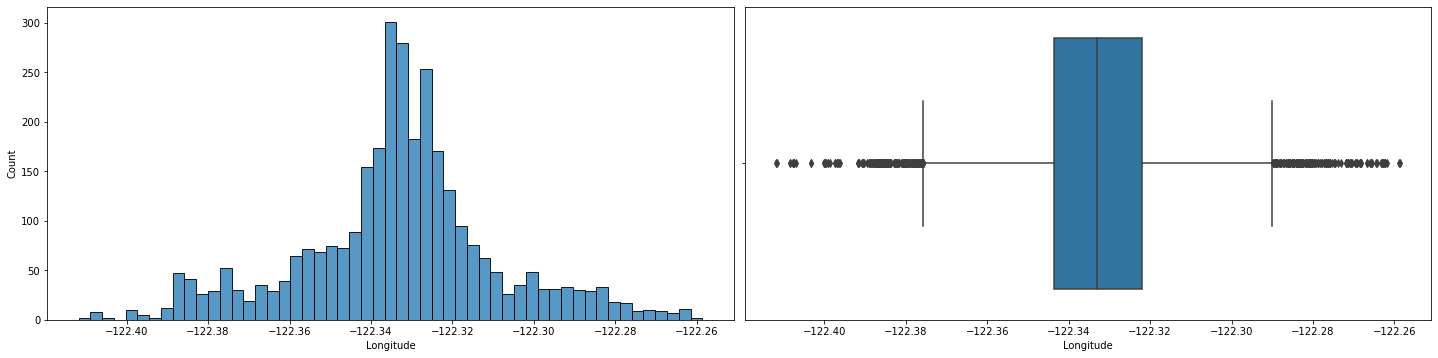

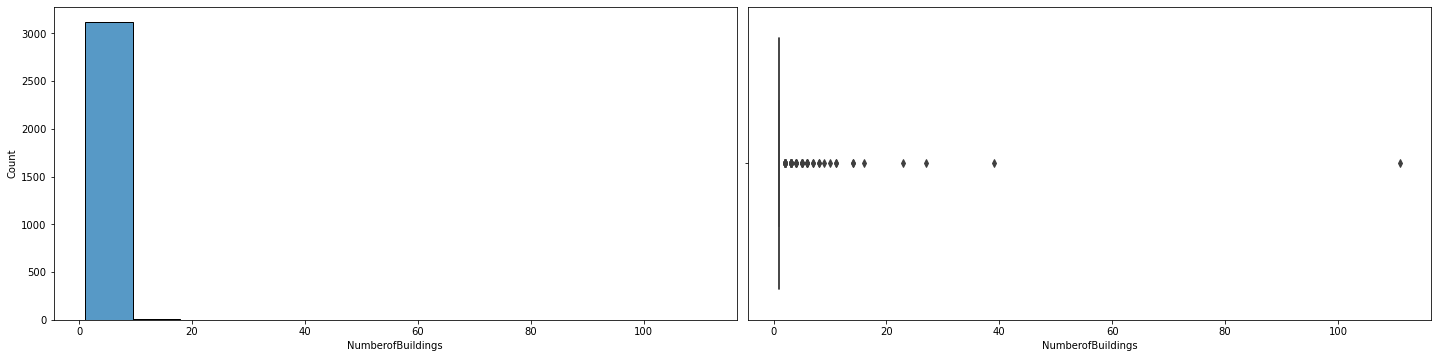

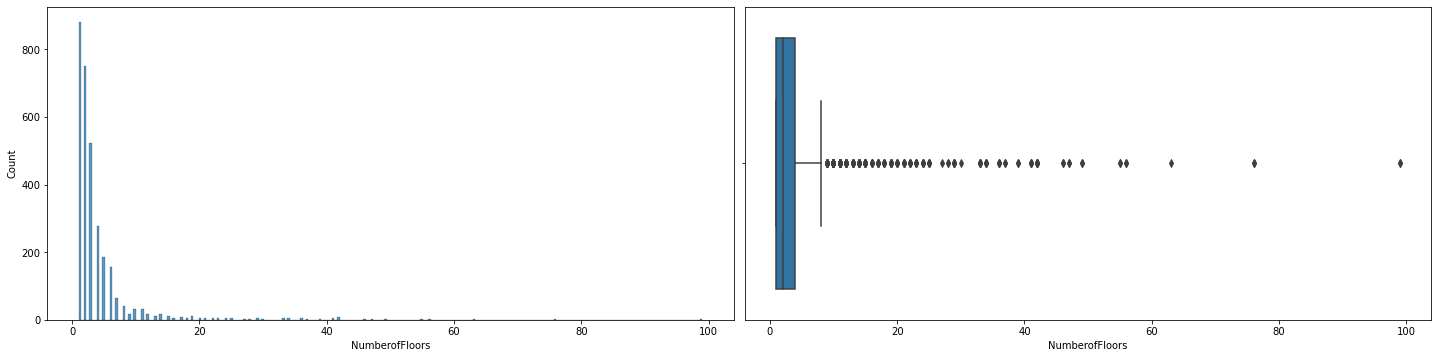

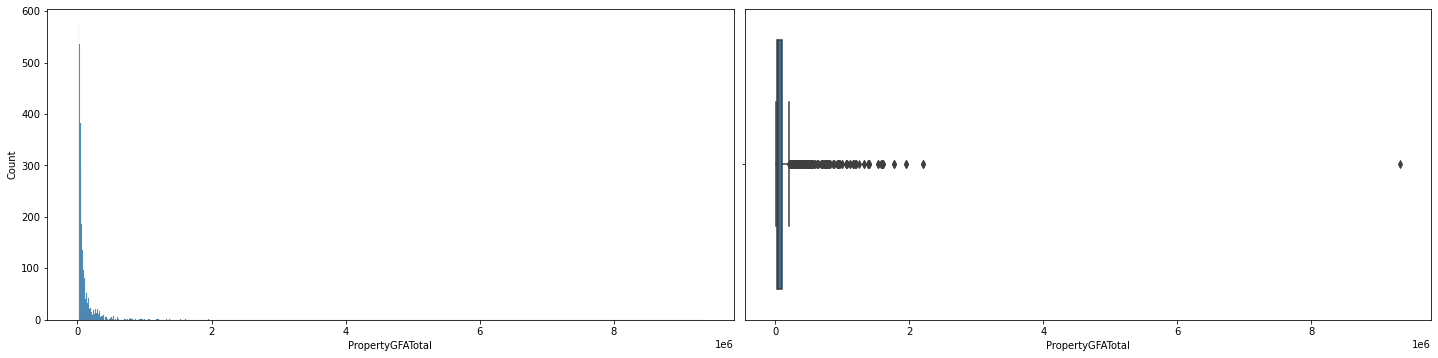

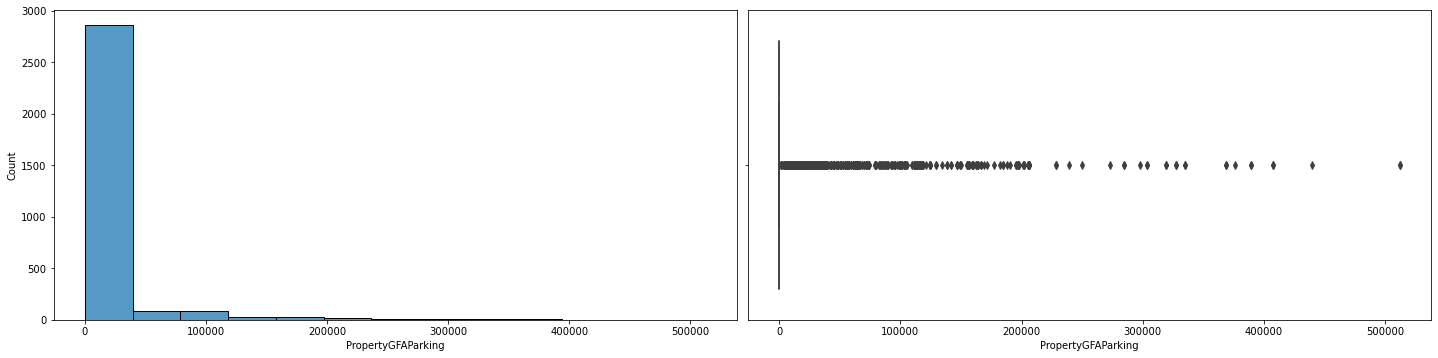

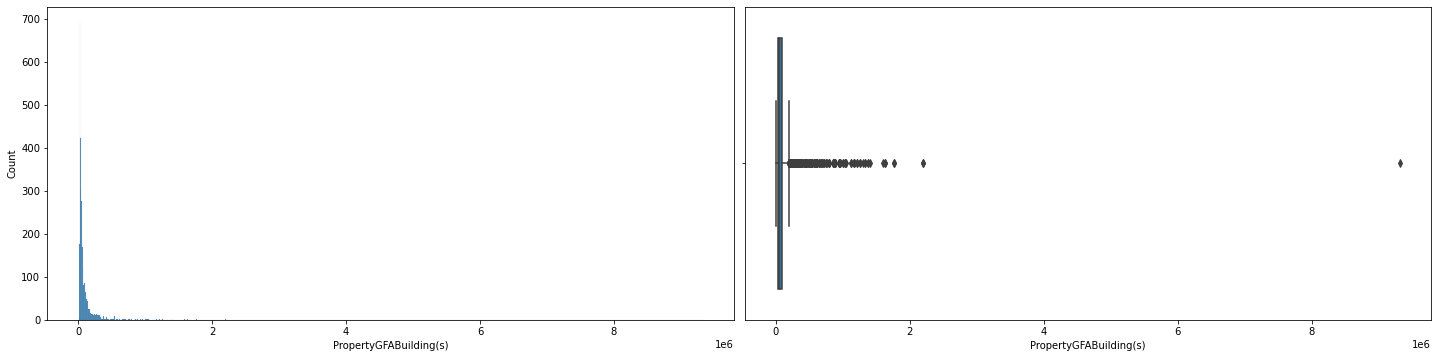

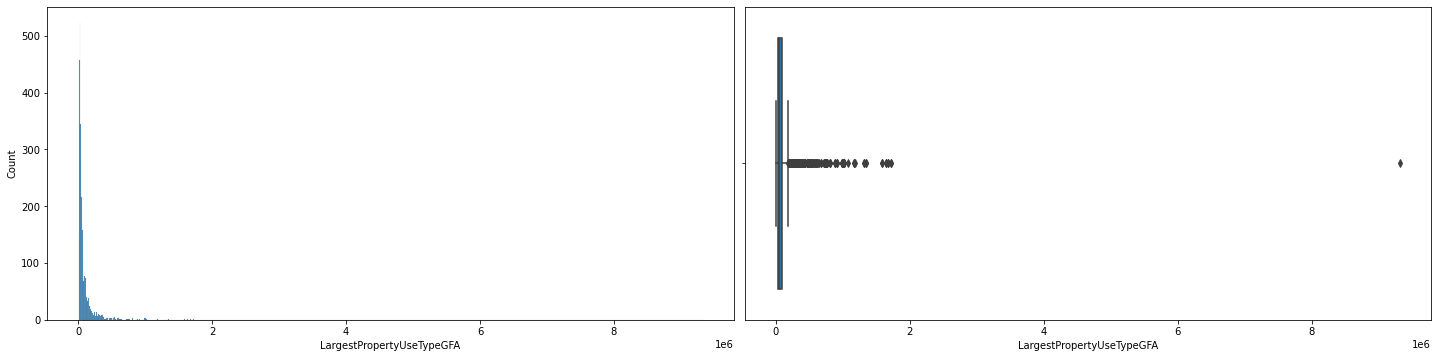

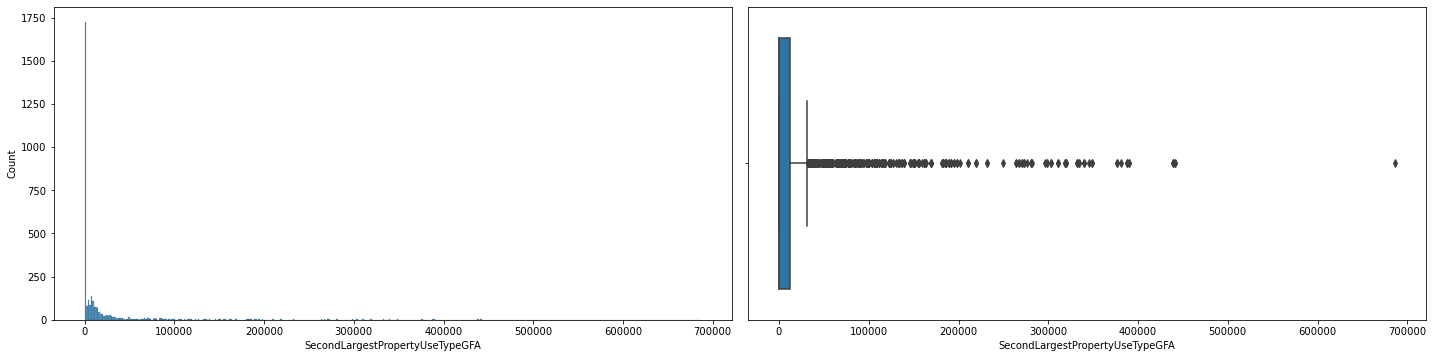

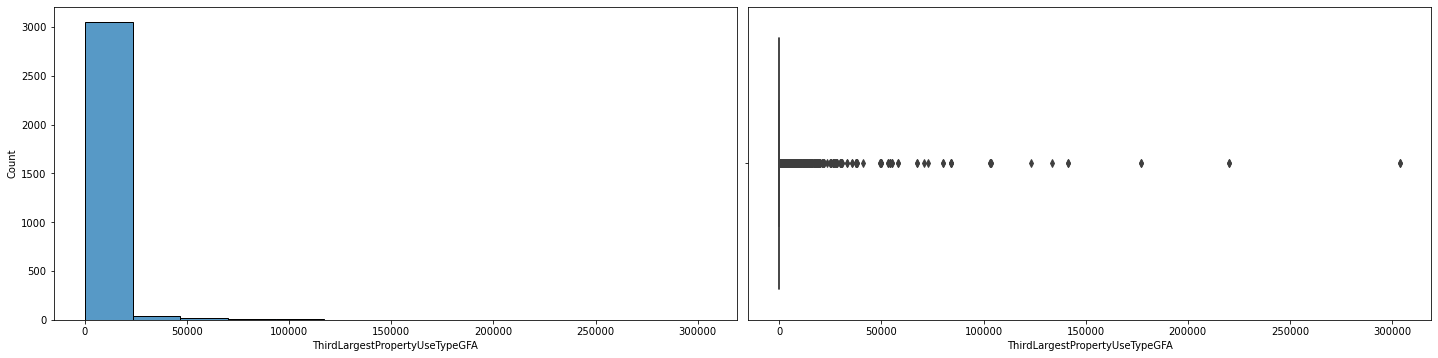

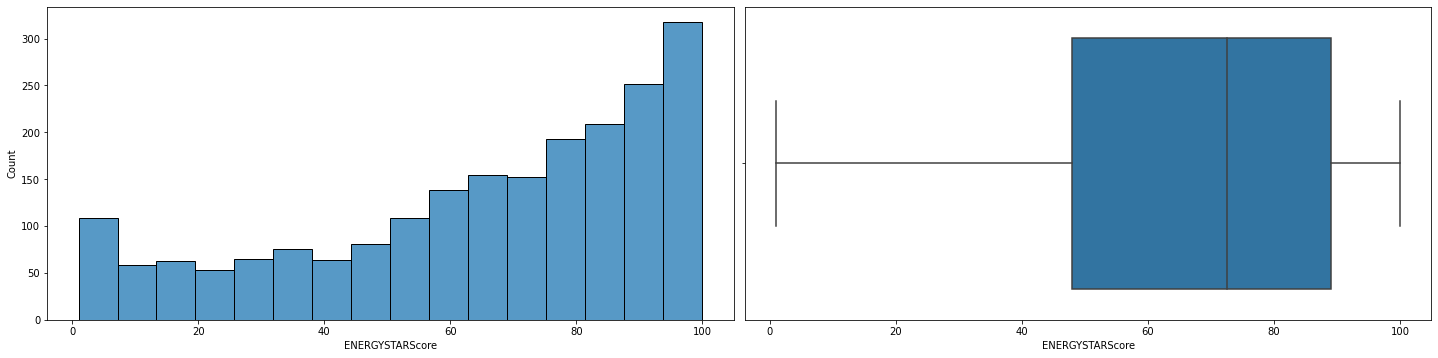

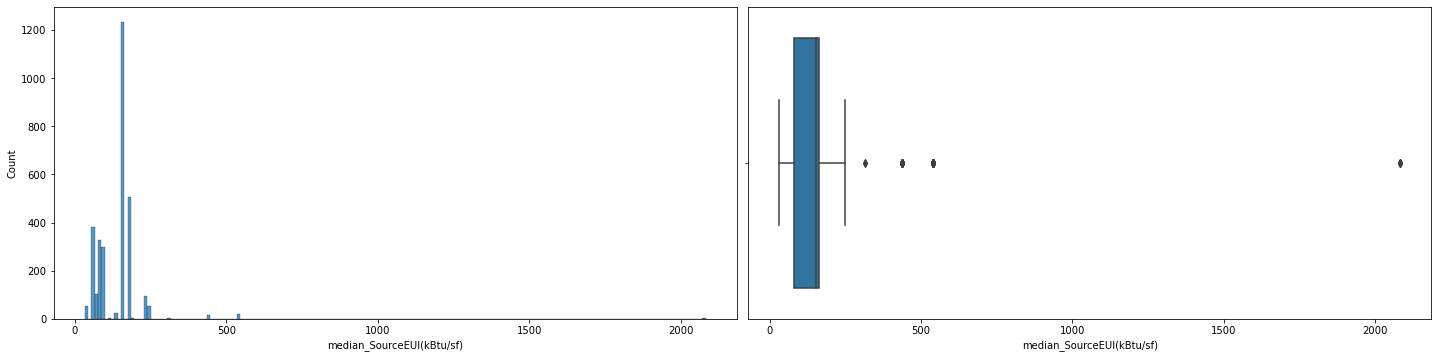

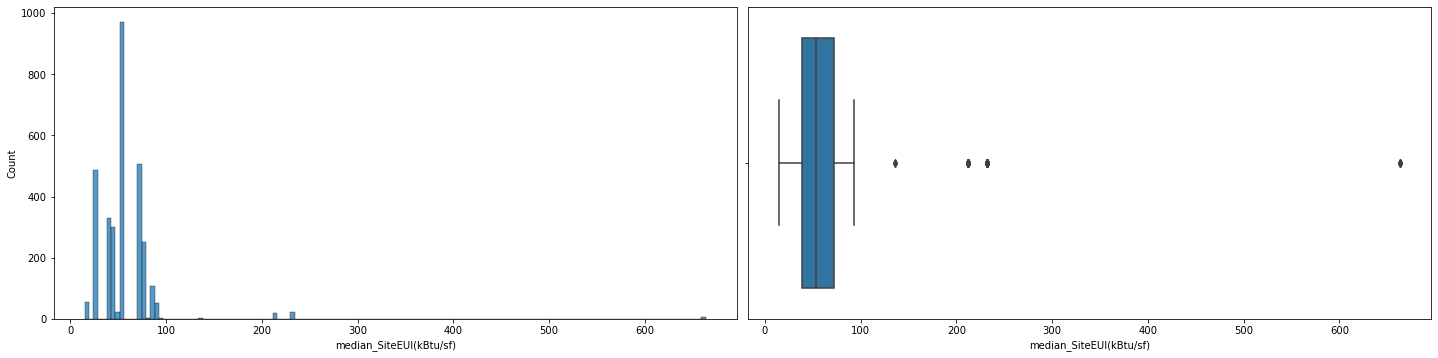

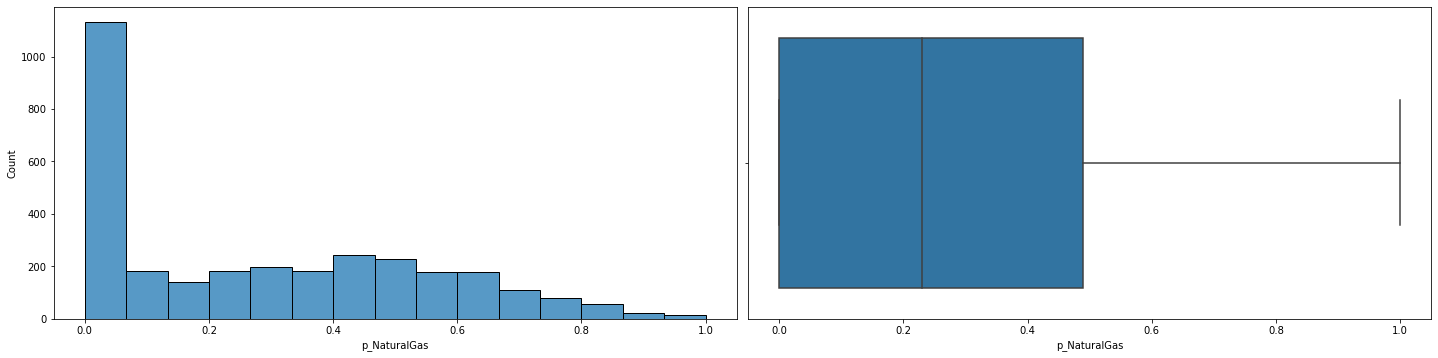

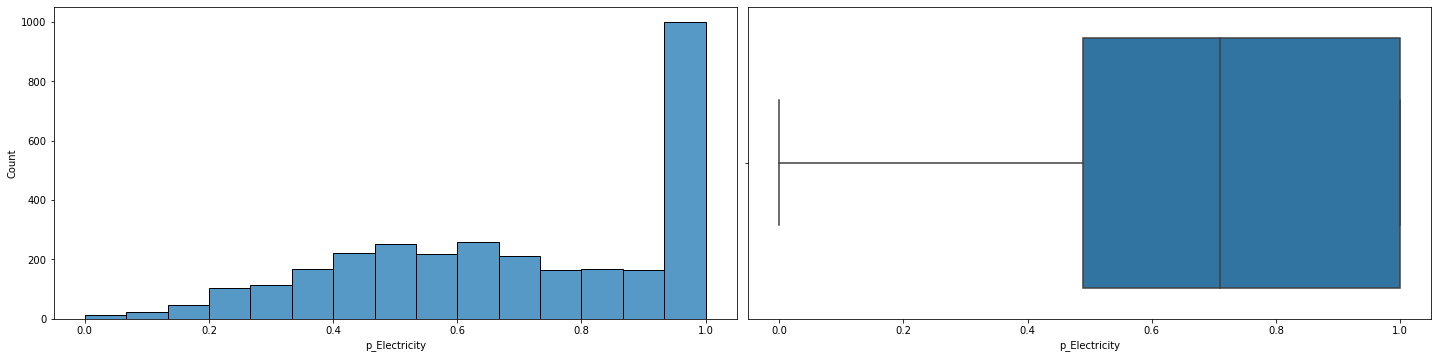

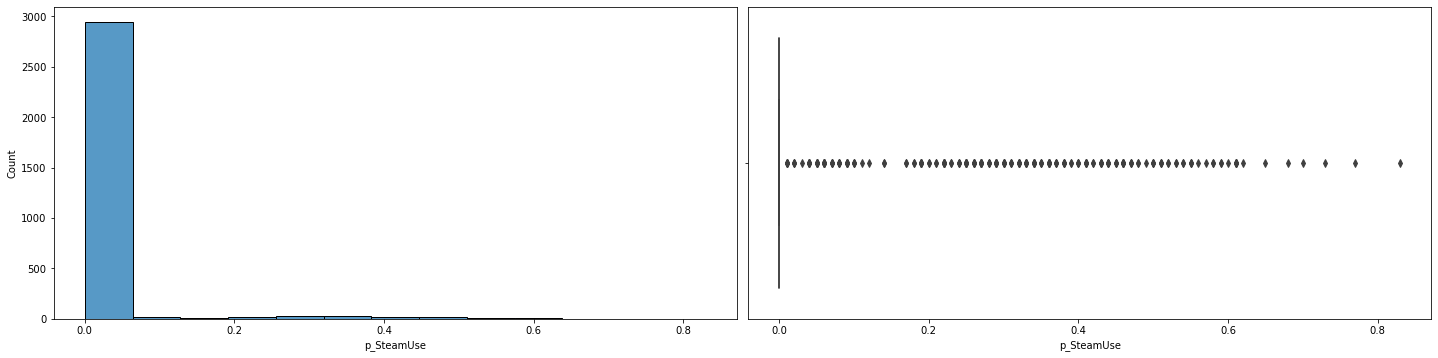

In [22]:
# Histogram of all continous categories

targets = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']
df_continous = df.loc[:, ~df.columns.isin(targets)].select_dtypes('float')
for col in df_continous:
    fig = plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(x=df[col], data=df)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], data=df)
    fig.tight_layout(pad=0.8)

### 3. Categorical features

In [23]:
# Column by column analysis
df_cat = df.loc[:, ~df.columns.isin(['OSEBuildingID', 'Address'])].select_dtypes('object')
for column in df_cat:
    if df[column].nunique() < 20:
        print('Column {}, unique value :\n{}\n'.format(column, df[column].unique()))
    else:
        print('Column {}, {} unique value'.format(column, df[column].nunique()))

Column DataYear, unique value :
[2015 2016]

Column BuildingType, unique value :
['NonResidential' 'Nonresidential COS' 'SPS-District K-12' 'Campus'
 'Nonresidential WA']

Column PrimaryPropertyType, 20 unique value
Column CouncilDistrictCode, unique value :
[7 3 2 4 5 6 1]

Column Neighborhood, unique value :
['DOWNTOWN' 'SOUTHEAST' 'NORTHEAST' 'EAST' 'NORTH' 'MAGNOLIA / QUEEN ANNE'
 'LAKE UNION' 'BALLARD' 'GREATER DUWAMISH' 'NORTHWEST' 'CENTRAL'
 'SOUTHWEST' 'DELRIDGE']

Column YearBuilt, 113 unique value
Column LargestPropertyUseType, 22 unique value
Column SecondLargestPropertyUseType, 20 unique value
Column ThirdLargestPropertyUseType, 20 unique value


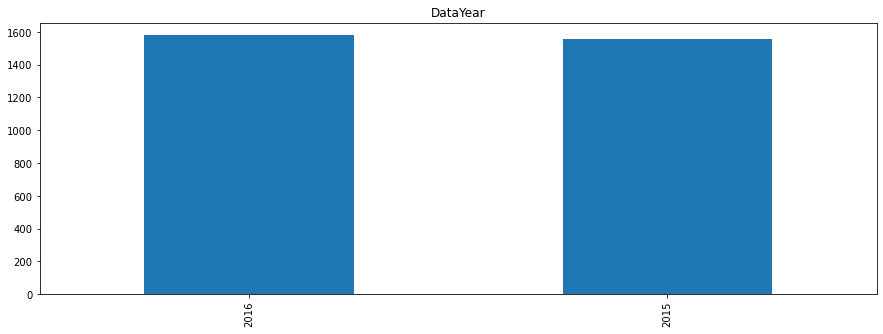

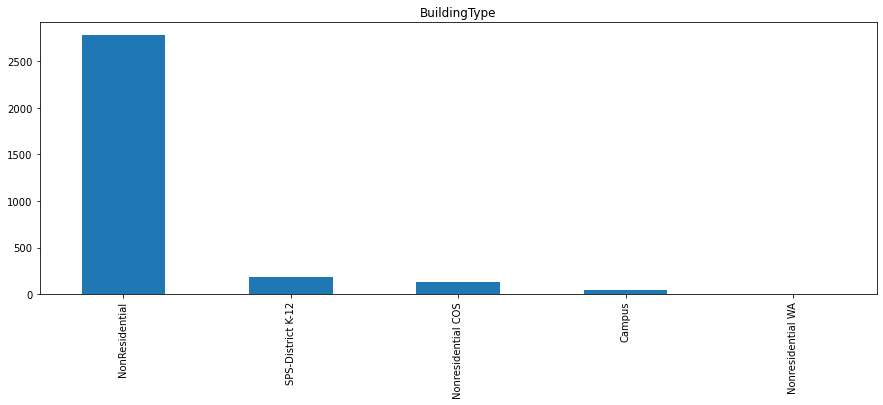

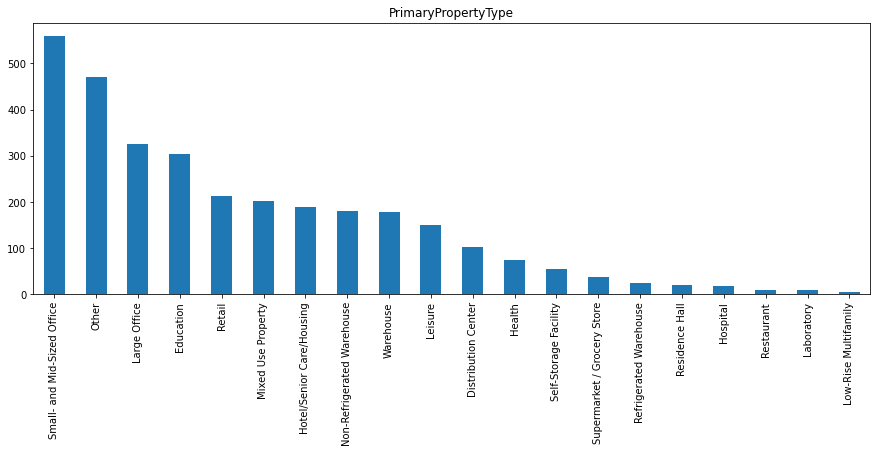

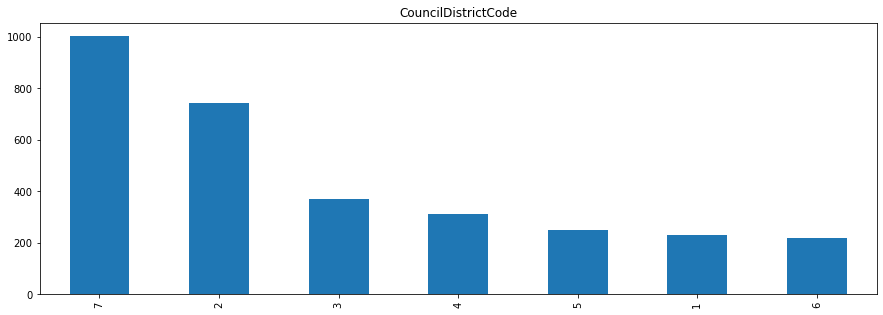

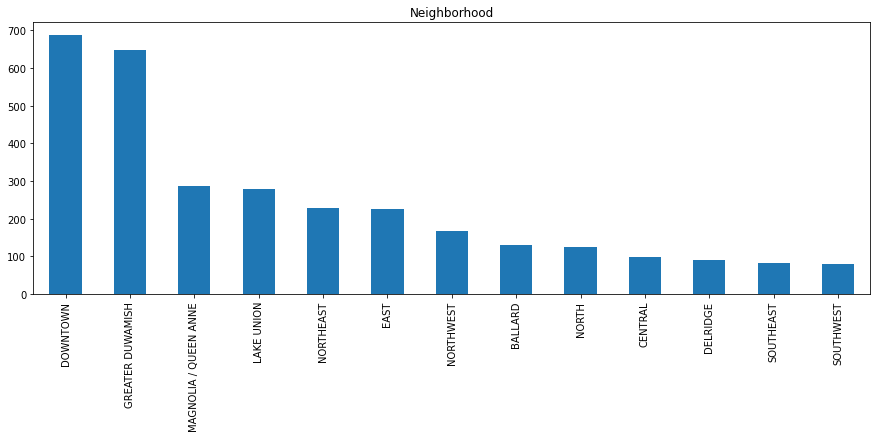

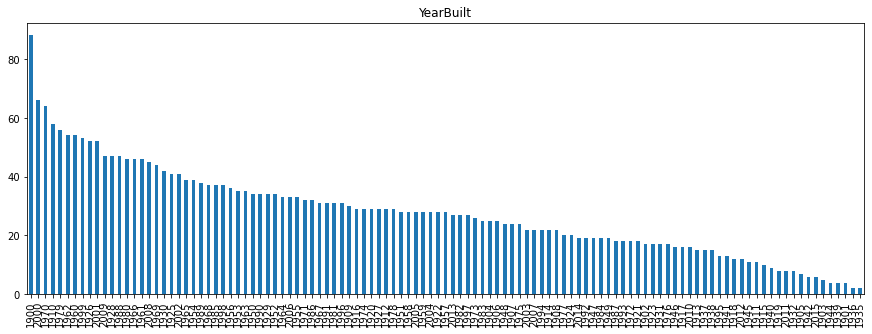

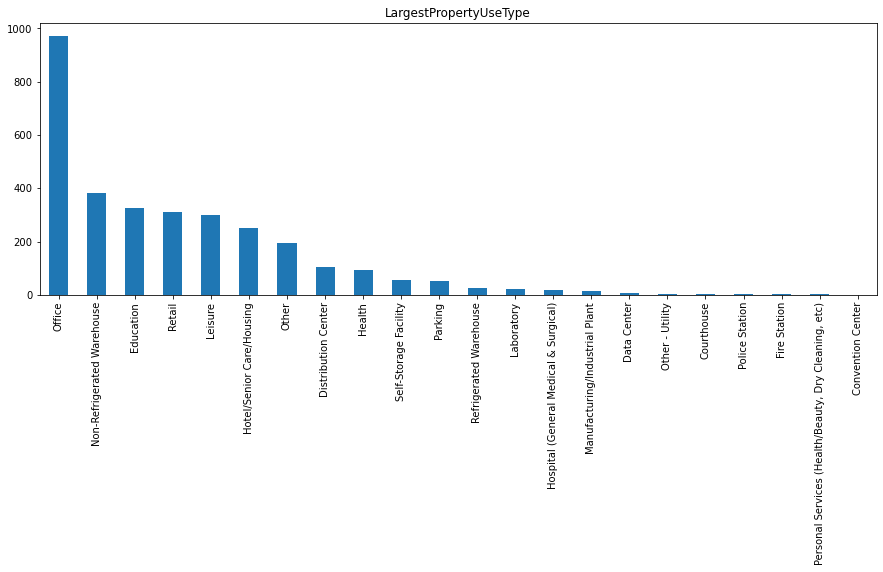

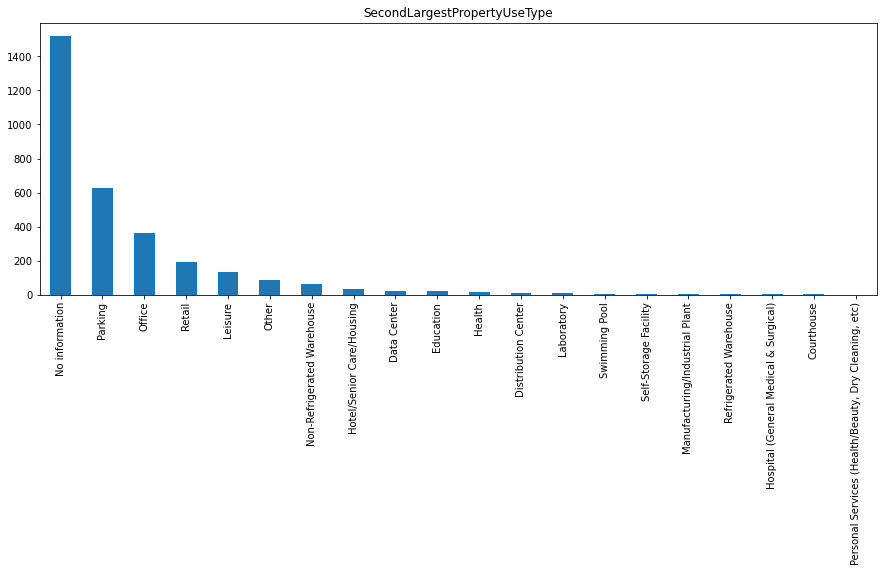

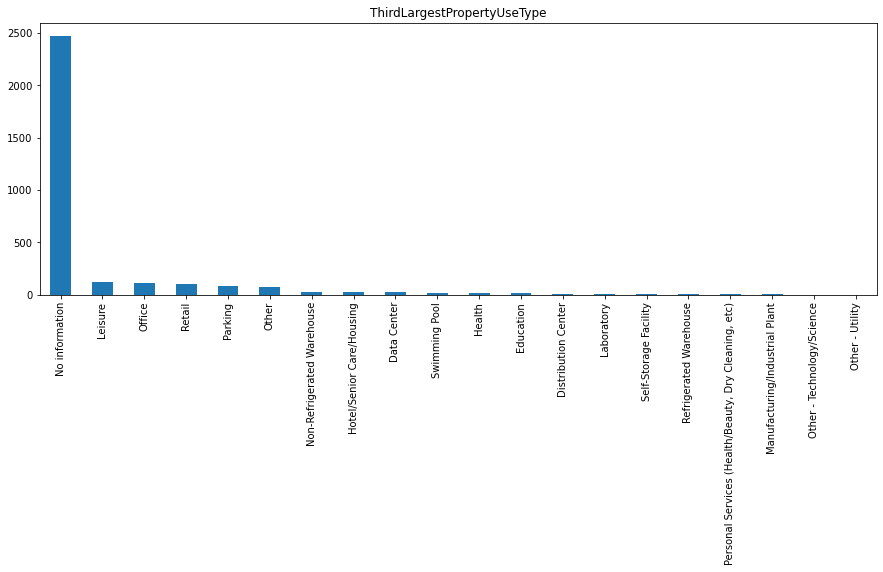

In [24]:
# Barchart of all categorial features

for col in df.loc[:, ~df.columns.isin(['OSEBuildingID', 'Address'])].select_dtypes('object'):
    plt.figure(figsize=(15, 5))
    df.loc[:, col].value_counts().plot.bar()
    plt.title(col)
    fig.tight_layout(pad=0.8)

## Target / features relation

In [25]:
corr = df.loc[:, [col, 'SiteEnergyUse(kBtu)']].corr()

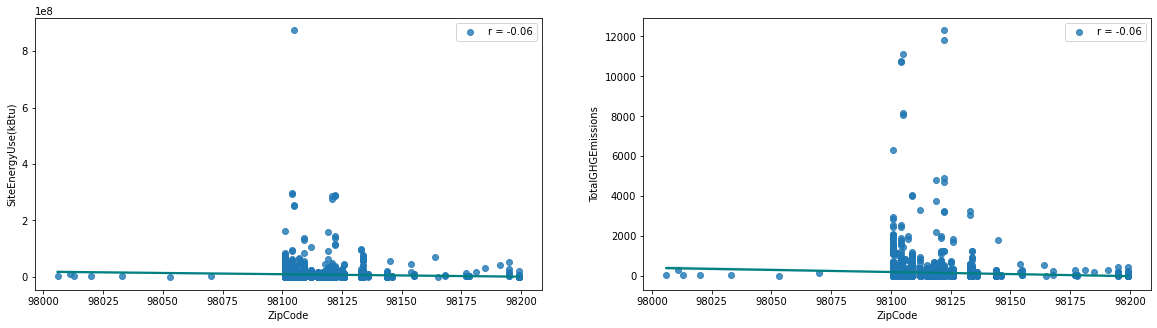

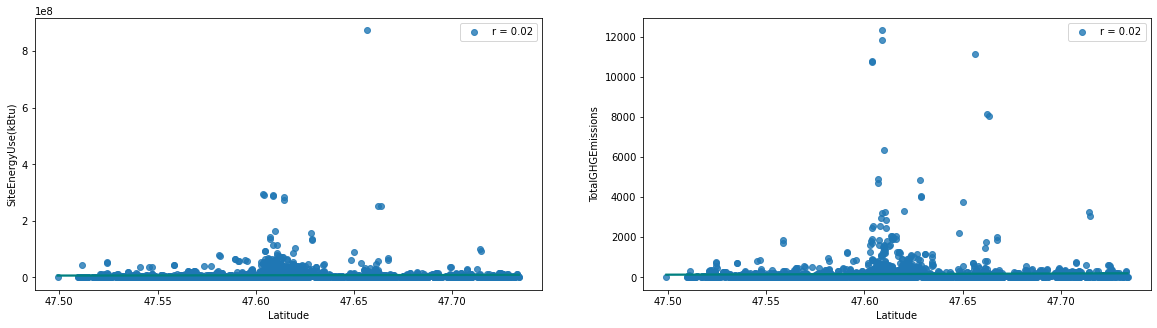

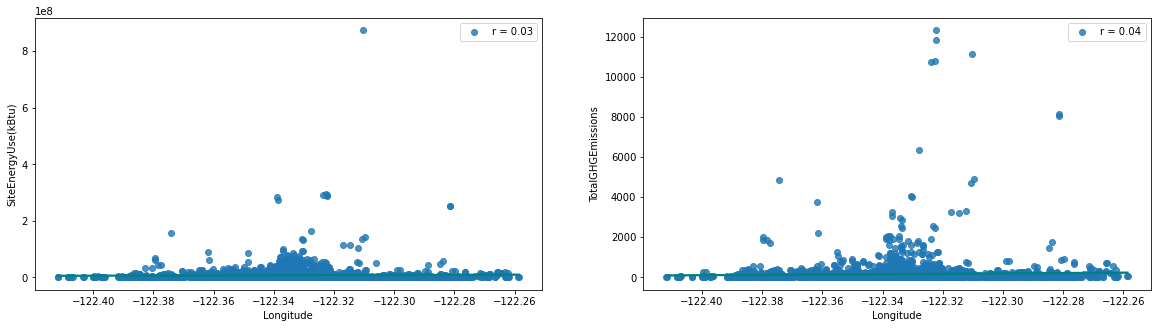

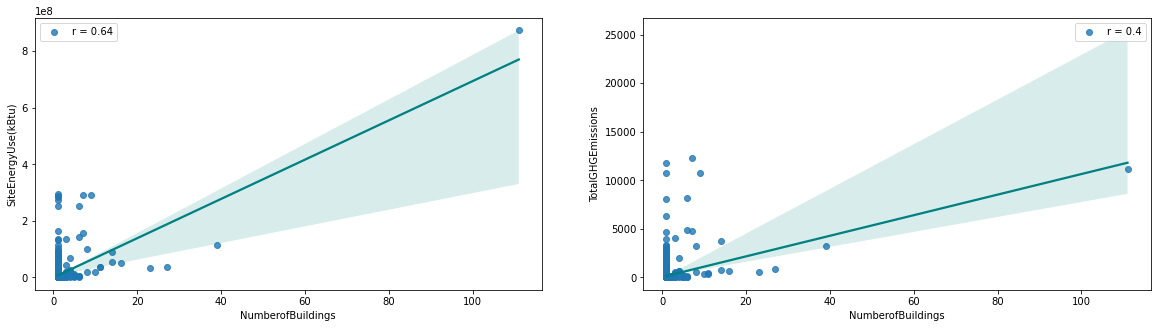

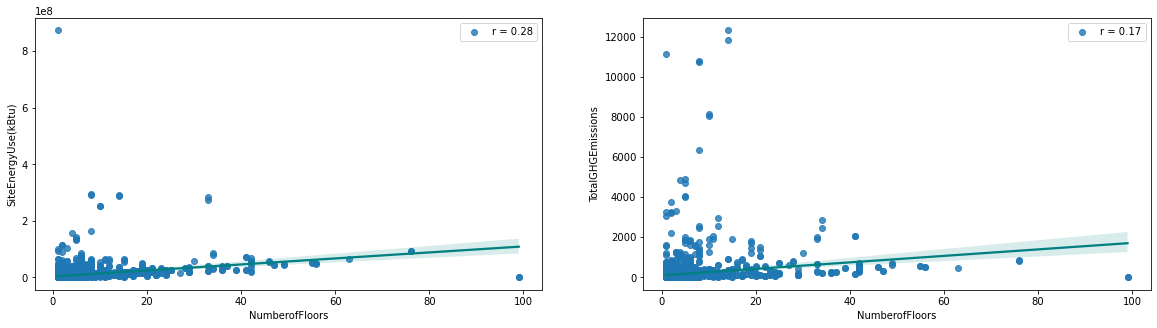

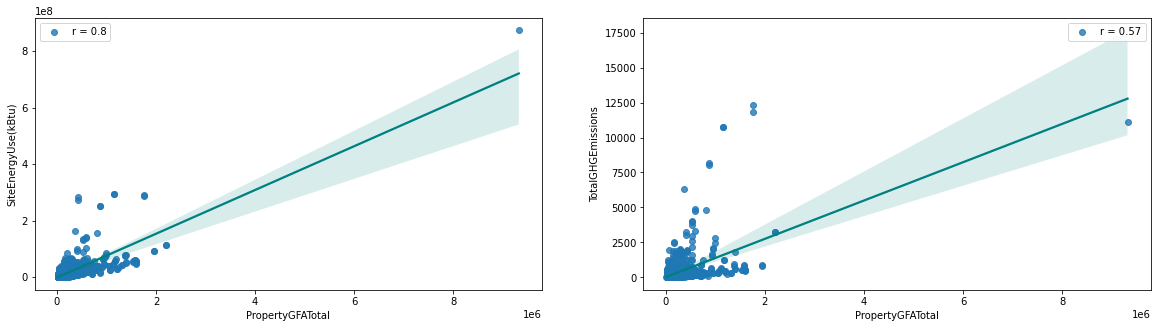

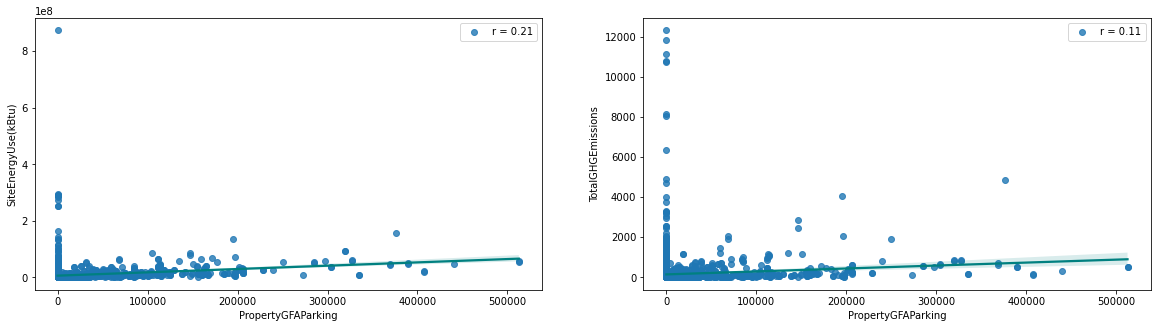

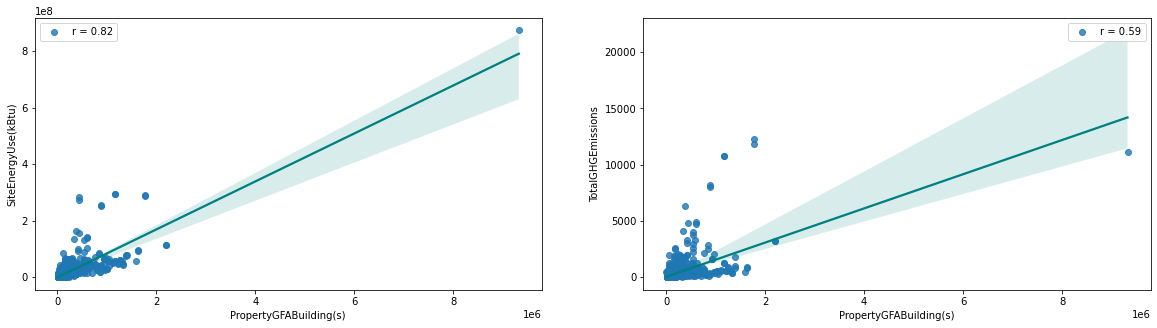

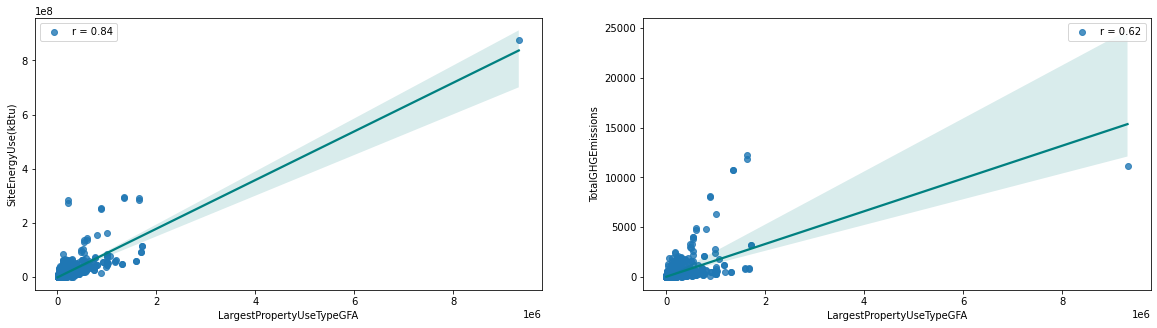

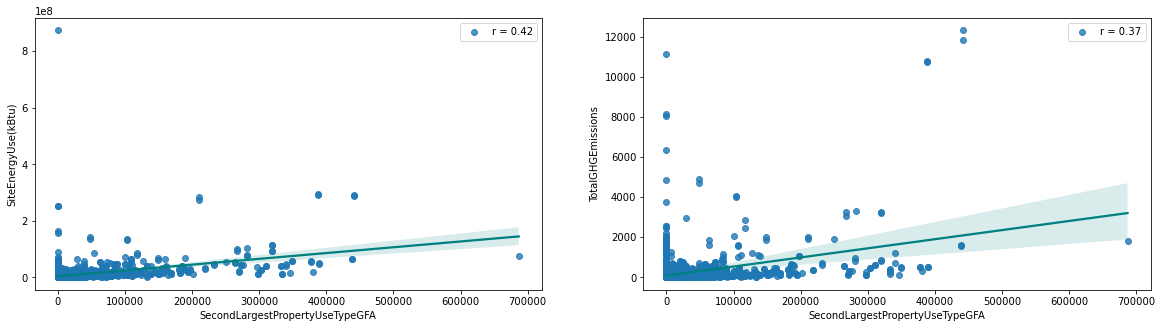

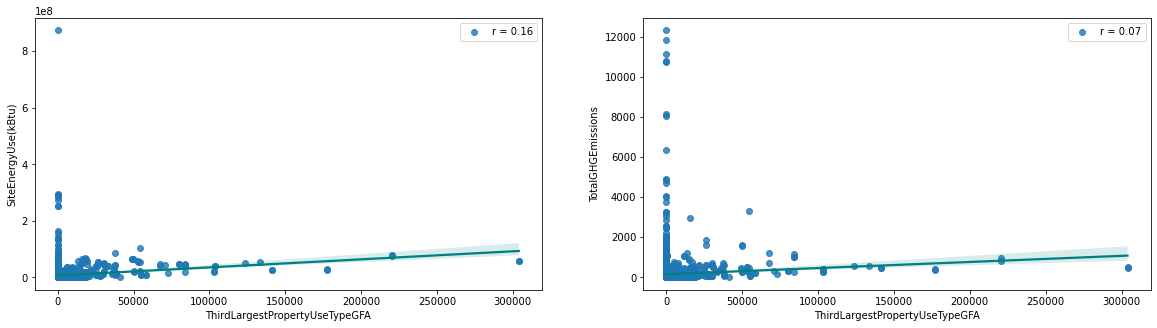

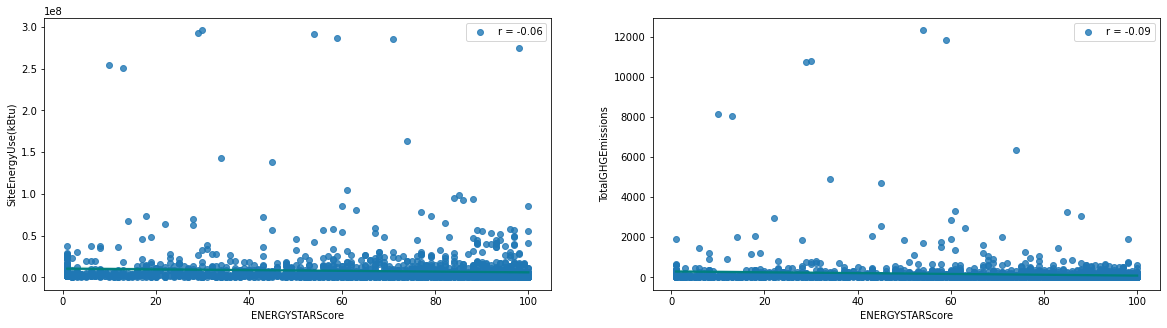

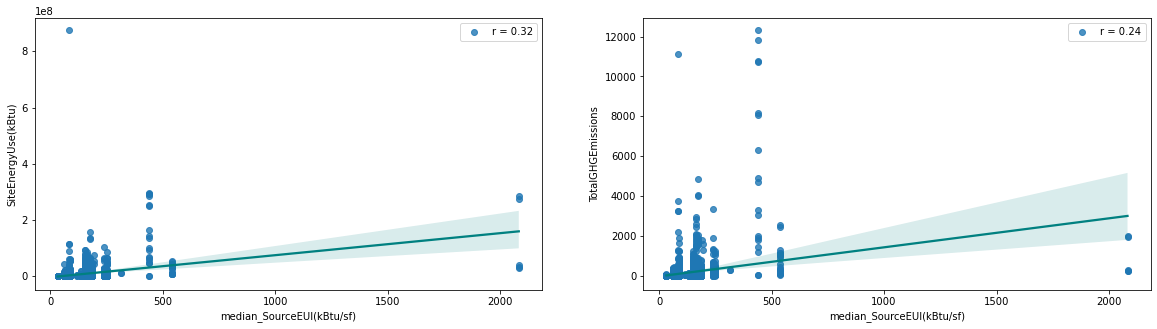

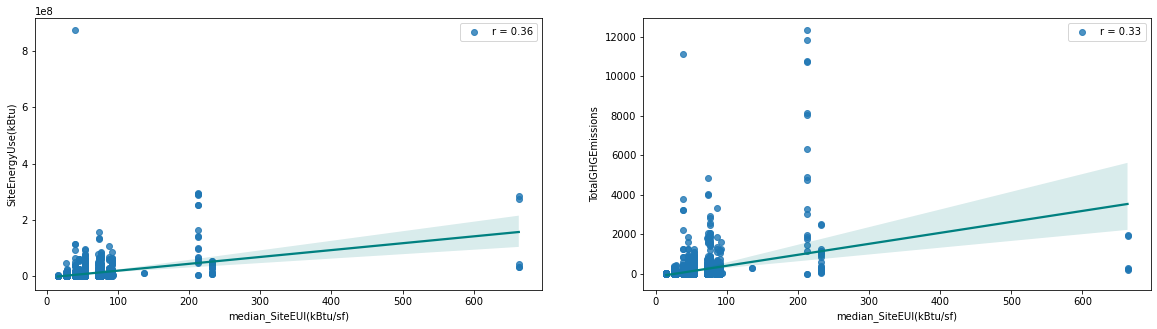

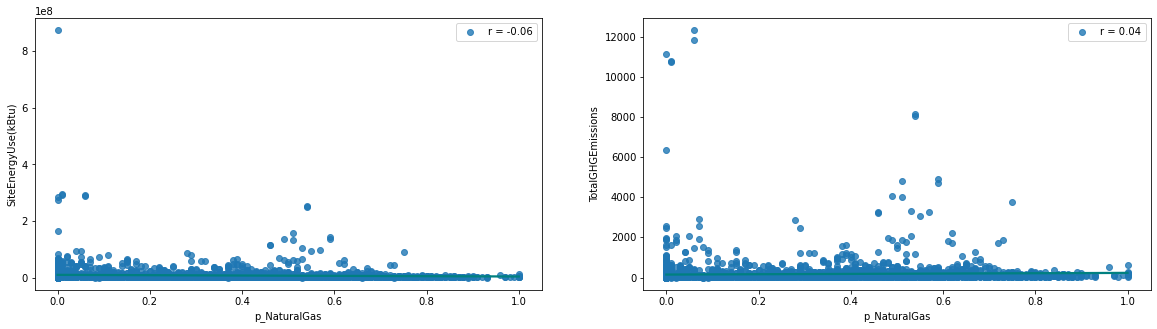

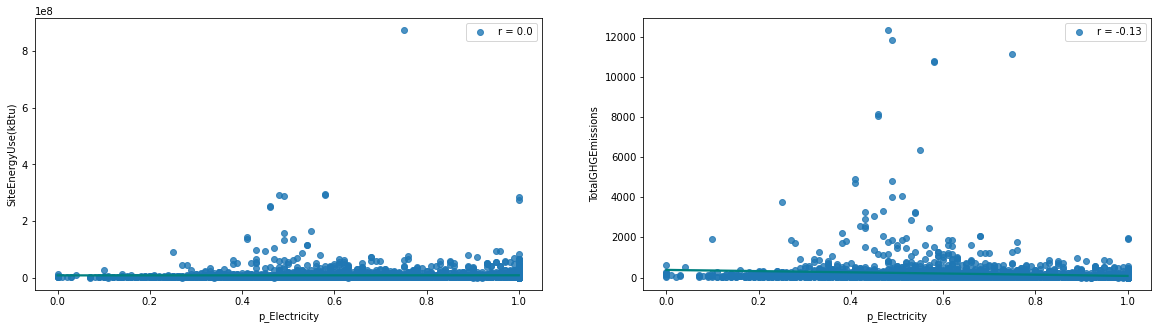

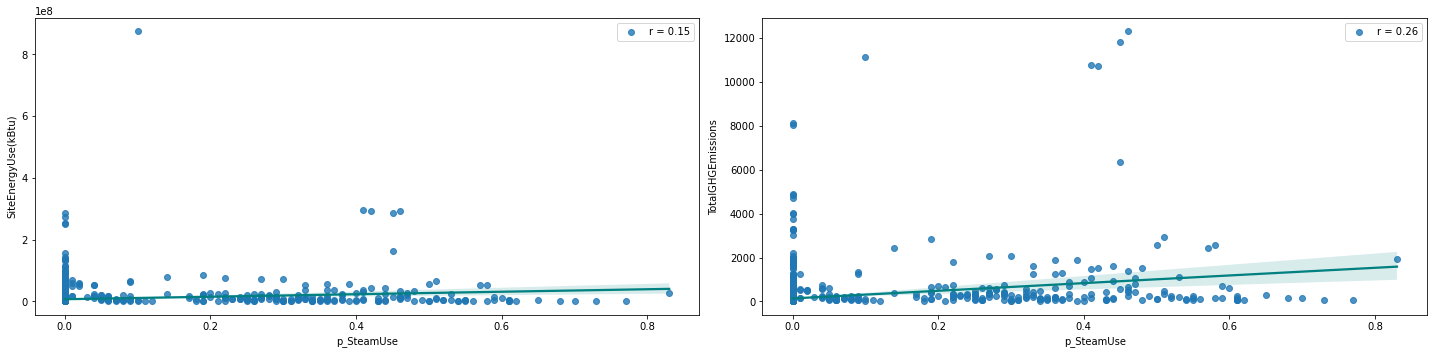

In [26]:
# Scatter plot + linear regression line to see effect of each continous varibale on log(target)

for col in df_continous:
    corr_energy = df.loc[:, [col, 'SiteEnergyUse(kBtu)']].corr()
    corr_GHG = df.loc[:, [col, 'TotalGHGEmissions']].corr()
    fig = plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
    ax = sns.regplot(x=col,
                     y='SiteEnergyUse(kBtu)',
                     data=df,
                     line_kws={"color" : 'teal'},
                     label= 'r = {:.4}'.format(round(corr_energy.iloc[0, 1], 2)))
    plt.legend()

    plt.subplot(1, 2, 2)
    ax = sns.regplot(x=col,
                     y='TotalGHGEmissions',
                     data=df,
                     line_kws={"color" : 'teal'},
                     label='r = {:.4}'.format(round(corr_GHG.iloc[0, 1], 2)))
    plt.legend()

plt.tight_layout(pad=1)
plt.show()

In [27]:
# Correlation matrix between all numerical variable

df_numeric = df.select_dtypes('float')

corr = df_numeric.corr('spearman')
corr.style.background_gradient(cmap='coolwarm')

,ZipCode,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,median_SourceEUI(kBtu/sf),median_SiteEUI(kBtu/sf),p_NaturalGas,p_Electricity,p_SteamUse
ZipCode,1.000000,-0.104003,0.077981,0.033003,-0.342500,-0.157226,-0.168409,-0.140897,-0.108730,-0.165648,-0.150350,-0.018884,-0.177540,-0.139336,-0.136619,-0.156872,0.131798,-0.050286,-0.269573
Latitude,-0.104003,1.000000,-0.139852,0.000574,0.153585,-0.007675,0.131903,-0.039028,-0.002103,-0.027147,-0.013163,0.029074,0.067156,0.070444,0.219118,0.216411,0.050081,-0.037509,-0.046986
Longitude,0.077981,-0.139852,1.000000,0.042119,-0.096498,-0.065640,-0.100105,-0.060445,-0.038133,-0.085757,-0.051492,-0.045776,-0.048233,-0.026168,-0.018850,-0.018234,0.047205,-0.042997,-0.023304
NumberofBuildings,0.033003,0.000574,0.042119,1.000000,-0.018256,0.092587,-0.004902,0.094614,0.112302,-0.020804,-0.017615,-0.029460,0.115887,0.107801,0.017169,0.024401,0.025072,-0.031673,0.008841
NumberofFloors,-0.342500,0.153585,-0.096498,-0.018256,1.000000,0.500198,0.450801,0.462356,0.435994,0.371269,0.220451,0.132668,0.430015,0.279824,0.276258,0.342290,-0.264120,0.196470,0.252325
PropertyGFATotal,-0.157226,-0.007675,-0.065640,0.092587,0.500198,1.000000,0.427287,0.979644,0.919881,0.357715,0.206811,0.137537,0.731605,0.569652,0.152806,0.172637,-0.174753,0.133839,0.188260
PropertyGFAParking,-0.168409,0.131903,-0.100105,-0.004902,0.450801,0.427287,1.000000,0.289657,0.335254,0.425801,0.204397,0.025235,0.361426,0.207856,0.239074,0.274532,-0.213272,0.220522,0.029618
PropertyGFABuilding(s),-0.140897,-0.039028,-0.060445,0.094614,0.462356,0.979644,0.289657,1.000000,0.918457,0.310725,0.189816,0.147185,0.712852,0.571310,0.112936,0.129985,-0.147603,0.102799,0.198132
LargestPropertyUseTypeGFA,-0.108730,-0.002103,-0.038133,0.112302,0.435994,0.919881,0.335254,0.918457,1.000000,0.150053,0.030032,0.168232,0.692056,0.553507,0.110644,0.129986,-0.144391,0.101117,0.182513
SecondLargestPropertyUseTypeGFA,-0.165648,-0.027147,-0.085757,-0.020804,0.371269,0.357715,0.425801,0.310725,0.150053,1.000000,0.552926,0.081437,0.332895,0.215712,0.144897,0.156319,-0.184138,0.178099,0.085104


In [28]:
# Spearman Correlation, pvalue for all features vs target
for row in targets:
    for col in corr.columns:
        if (row != col) and (corr.loc[row, col] > 0.05) or (corr.loc[row, col] < -0.05):
            spearman_coef, p_value = stats.spearmanr(np.array(df_numeric[row]), np.array(df_numeric[col]))
            if p_value < 0.05:
                print(f'{row :-<5} {col:-<50} {corr.loc[row, col]} {p_value} ')

SiteEnergyUse(kBtu) ZipCode------------------------------------------- -0.1775404914836776 1.3555424600068474e-23 
SiteEnergyUse(kBtu) Latitude------------------------------------------ 0.06715552075507854 0.00016919760025839757 
SiteEnergyUse(kBtu) NumberofBuildings--------------------------------- 0.11588656114918429 7.77736909912798e-11 
SiteEnergyUse(kBtu) NumberofFloors------------------------------------ 0.430015167389631 3.582705632406522e-141 
SiteEnergyUse(kBtu) PropertyGFATotal---------------------------------- 0.7316048073868592 0.0 
SiteEnergyUse(kBtu) PropertyGFAParking-------------------------------- 0.36142639835121126 2.8263201667755227e-97 
SiteEnergyUse(kBtu) PropertyGFABuilding(s)---------------------------- 0.7128523422176487 0.0 
SiteEnergyUse(kBtu) LargestPropertyUseTypeGFA------------------------- 0.6920560980774194 0.0 
SiteEnergyUse(kBtu) SecondLargestPropertyUseTypeGFA------------------- 0.332894814905252 6.31502953464012e-82 
SiteEnergyUse(kBtu) ThirdLargestP

We can see a strong correlation with SiteEnergyUse and the following features PropertyGFATotal, PropertyGFABuilding(s) and LargestPropertyUseTypeGFA.
Same correlations for TotalGHGEmission.

Following the statistical analysis features which are statistically correlated with target and with a p_value < 0.05 of each target are the following:

SiteEnergyUse : 
    
    ZipCode
    NumberofBuildings
    NumberofFloors
    PropertyGFAParking
    PropertyGFABuilding(s)
    LargestPropertyUseTypeGFA
    SecondLargestPropertyUseTypeGFA
    ThirdLargestPropertyUseTypeGFA
    median_SiteEUI(kBtu/sf)
    p_SteamUse
    
TotalGHGEmission : 

    ZipCode
    NumberofBuildings
    NumberofFloors
    PropertyGFAParking
    PropertyGFABuilding(s)
    LargestPropertyUseTypeGFA
    SecondLargestPropertyUseTypeGFA
    ThirdLargestPropertyUseTypeGFA
    median_SiteEUI(kBtu/sf)
    p_SteamUse
    p_Electricity

Too much col in Address
Too much col in YearBuilt


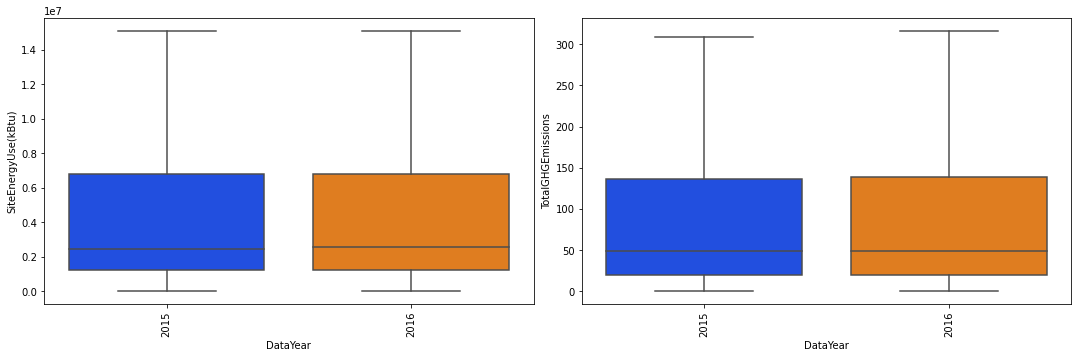

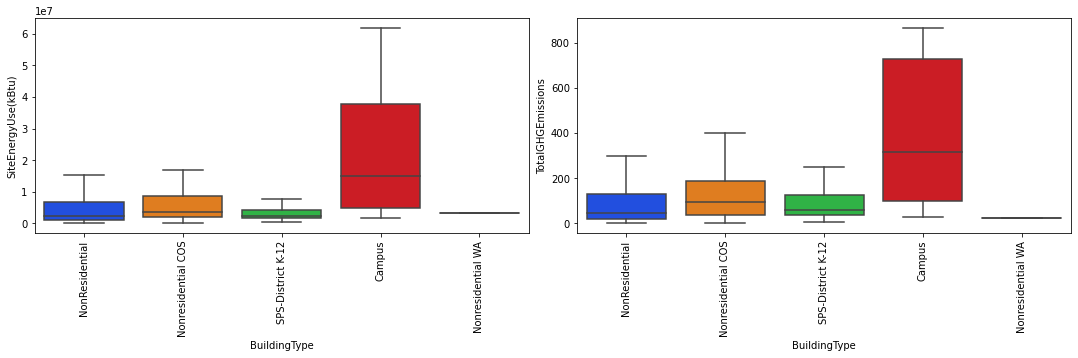

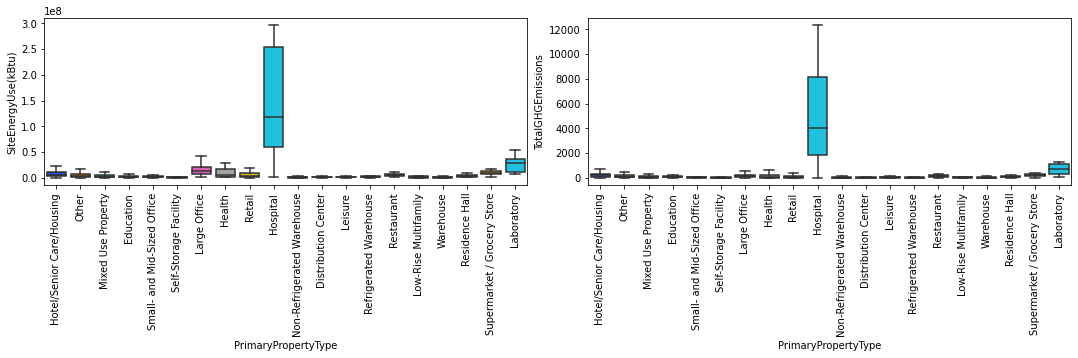

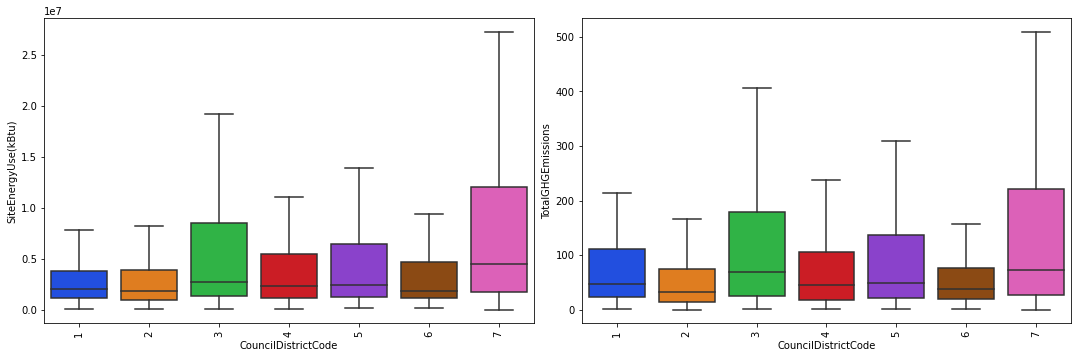

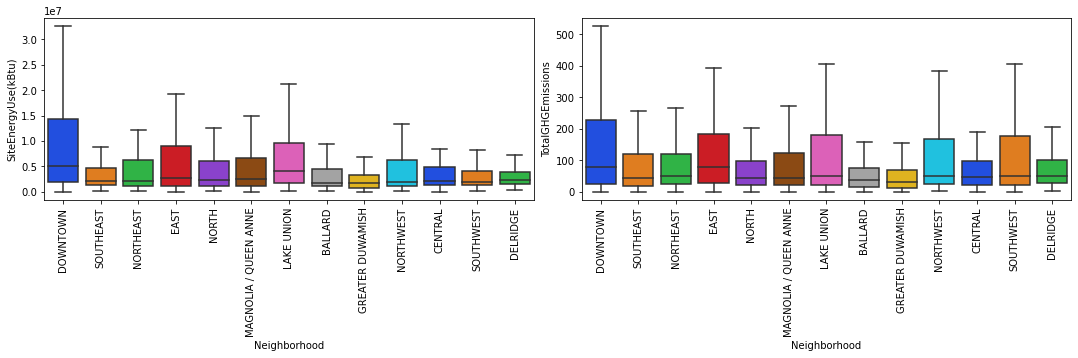

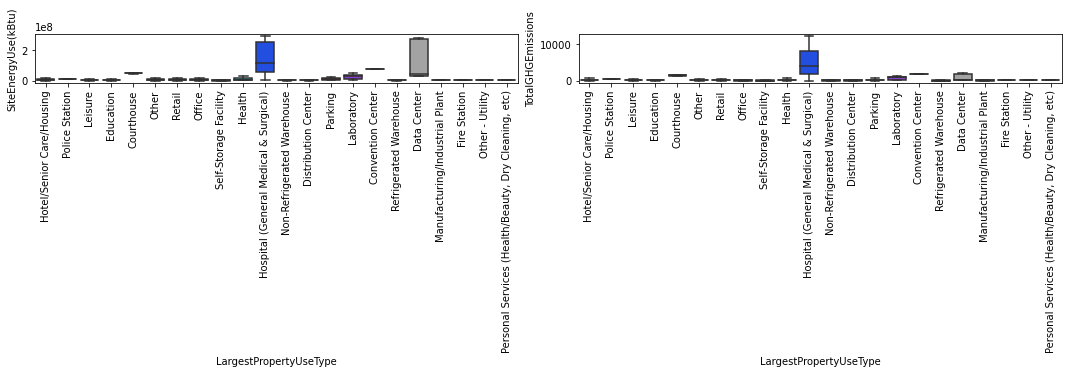

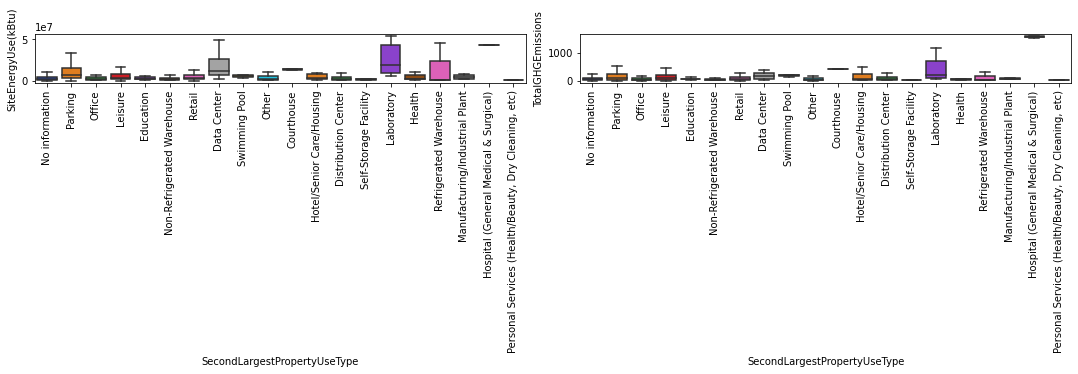

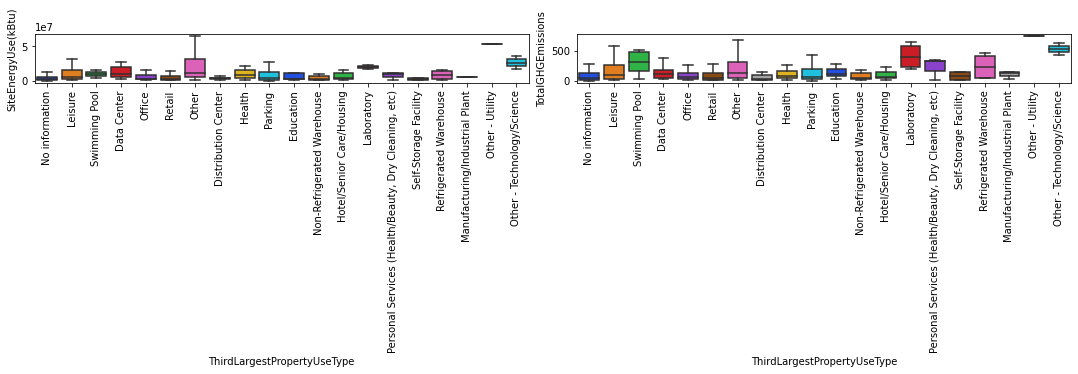

In [29]:
# Boxplot To see relation between categorial variable and target
for col in df.loc[:, df.columns != 'OSEBuildingID'].select_dtypes('object'):
    if df[col].nunique() < 30:
        fig = plt.figure(figsize=(15, 5))

        plt.subplot(1, 2, 1)
        ax = sns.boxplot(y='SiteEnergyUse(kBtu)',
                         x=col,
                         palette='bright',
                         data=df,
                         showfliers=False)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        ax = sns.boxplot(y='TotalGHGEmissions',
                         x=col,
                         palette='bright',
                         data=df,
                         showfliers=False)
        plt.xticks(rotation=90)
        fig.tight_layout(pad=0.8)
    else:
        print('Too much col in', col)
plt.show()

In [31]:
# ANOVA between target and categorical features
import statsmodels.api as sm
from statsmodels.formula.api import ols

df_aov = df.rename(columns={"SiteEnergyUse(kBtu)":"SiteEnergyUse"})
  

for col in df.loc[:,df.columns != 'OSEBuildingID'].select_dtypes('object'):
    model = ols(f'TotalGHGEmissions~C({col})', data=df_aov).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    print(f' {col}')
    display(aov_table)
    print('\n')


 DataYear


,sum_sq,df,F,PR(>F)
C(DataYear),3.299915e+04,1.0,0.089221,0.76519
Residual,1.157663e+09,3130.0,NaN,NaN




 BuildingType


,sum_sq,df,F,PR(>F)
C(BuildingType),3.754617e+07,4.0,26.203388,2.121808e-21
Residual,1.120150e+09,3127.0,NaN,NaN




 PrimaryPropertyType


,sum_sq,df,F,PR(>F)
C(PrimaryPropertyType),4.797830e+08,19.0,115.919633,0.0
Residual,6.779128e+08,3112.0,NaN,NaN




 Address


,sum_sq,df,F,PR(>F)
C(Address),1.145340e+09,2947.0,5.787578,2.651247e-38
Residual,1.235592e+07,184.0,NaN,NaN




 CouncilDistrictCode


,sum_sq,df,F,PR(>F)
C(CouncilDistrictCode),2.822295e+07,6.0,13.014439,1.367009e-14
Residual,1.129473e+09,3125.0,NaN,NaN




 Neighborhood


,sum_sq,df,F,PR(>F)
C(Neighborhood),3.036558e+07,12.0,7.001072,1.085349e-12
Residual,1.127330e+09,3119.0,NaN,NaN




 YearBuilt


,sum_sq,df,F,PR(>F)
C(YearBuilt),7.266724e+07,112.0,1.805272,7.562146e-07
Residual,1.085029e+09,3019.0,NaN,NaN




 LargestPropertyUseType


,sum_sq,df,F,PR(>F)
C(LargestPropertyUseType),4.836881e+08,21.0,106.277569,0.0
Residual,6.740077e+08,3110.0,NaN,NaN




 SecondLargestPropertyUseType


,sum_sq,df,F,PR(>F)
C(SecondLargestPropertyUseType),2.570116e+07,19.0,3.718727,9.002992e-08
Residual,1.131995e+09,3112.0,NaN,NaN




 ThirdLargestPropertyUseType


,sum_sq,df,F,PR(>F)
C(ThirdLargestPropertyUseType),5.948759e+06,19.0,0.845971,0.652213
Residual,1.151747e+09,3112.0,NaN,NaN


Following the ANOVA statistic test there are a signifiative (p < 0.05) relation between targets and :

    Building Type
    PrimaryPropertyType
    CouncilDistrictCode
    Neighborhood
    YearBuilt
    LargestPropertyUseType
    SecondLargestPropertyUseType
   

## Features / features relation

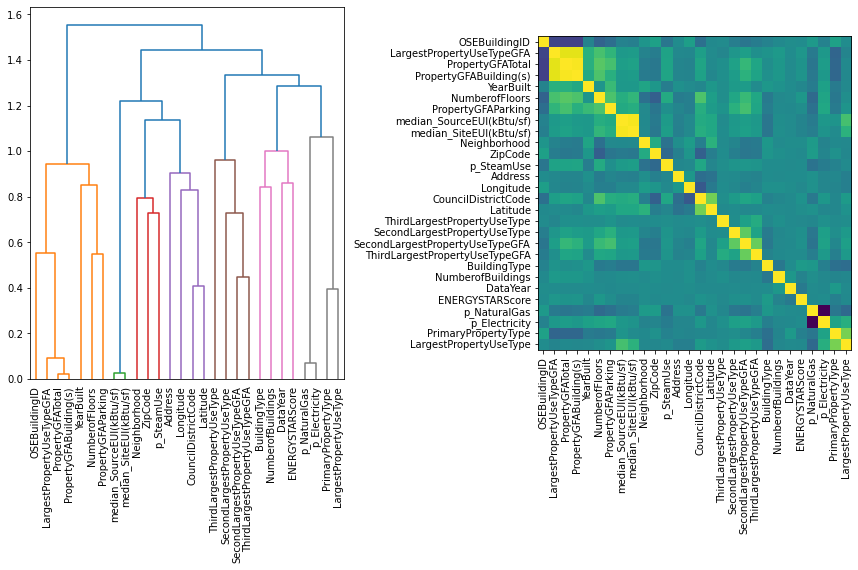

In [32]:
# Analyse of features/features relation

from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

df_features = df.loc[:, ~df.columns.isin(targets)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(df_features).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=df_features.columns.tolist(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
fig.tight_layout(pad=1)
plt.show()

We can see with this unsupervised clustering that a lot of features seems to be link together.

In [33]:
# VIF analysis of continous variable
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_aov = df.rename(columns={"SiteEnergyUse(kBtu)" : "SiteEnergyUse",
                            "PropertyGFABuilding(s)" : "PropertyGFABuilding",
                            "median_SiteEUI(kBtu/sf)" : "median_SiteEUI"})

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('SiteEnergyUse ~ ZipCode + NumberofBuildings + NumberofFloors + PropertyGFAParking + PropertyGFABuilding + LargestPropertyUseTypeGFA + SecondLargestPropertyUseTypeGFA + ThirdLargestPropertyUseTypeGFA + median_SiteEUI + p_SteamUse + p_Electricity', data=df_aov, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

In [34]:
vif

,VIF,variable
0,3.504564e+07,Intercept
1,1.056603e+00,ZipCode
2,3.136069e+00,NumberofBuildings
3,1.839159e+00,NumberofFloors
4,2.030326e+00,PropertyGFAParking
5,4.337913e+01,PropertyGFABuilding
6,3.918445e+01,LargestPropertyUseTypeGFA
7,2.502887e+00,SecondLargestPropertyUseTypeGFA
8,1.809086e+00,ThirdLargestPropertyUseTypeGFA
9,1.045977e+00,median_SiteEUI


VIF = VARIANCE INFALTION FACTOR
The VIF never excided 5 so we can considere a not so strong colinearity 

The value for VIF starts at 1 and has no upper limit. A general rule of thumb for interpreting VIFs is as follows:

    A value of 1 indicates there is no correlation between a given explanatory variable and any other explanatory variables in the model.
    A value between 1 and 5 indicates moderate correlation between a given explanatory variable and other explanatory variables in the model, but this is often not severe enough to require attention.
    A value greater than 5 indicates potentially severe correlation between a given explanatory variable and other explanatory variables in the model. In this case, the coefficient estimates and p-values in the regression output are likely unreliable.

Given that each of the VIF values for the explanatory variables in our regression model are close to 1, multicollinearity is not a problem in our example.

### Relation between localisation variable 

Text(0.5, 1.0, 'CouncilDistrictCode')

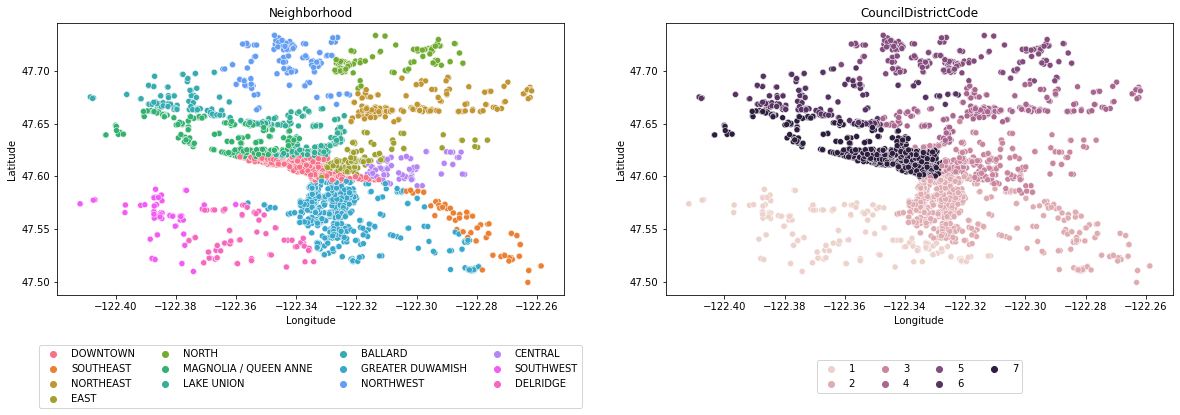

In [35]:
# Relation between localisation variable

fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
ax = sns.scatterplot(y='Latitude',
                     x='Longitude',
                     hue='Neighborhood',
                     data=df)
plt.legend(bbox_to_anchor=(0.5, -0.3), loc='center', ncol=4)
plt.title('Neighborhood')

plt.subplot(1, 2, 2)
ax = sns.scatterplot(y='Latitude',
                     x='Longitude',
                     hue='CouncilDistrictCode',
                     data=df)
plt.legend(bbox_to_anchor=(0.5, -0.3), loc='center', ncol=4)
plt.title('CouncilDistrictCode')

In [36]:
# creation of contengency table
Y = "LargestPropertyUseType"
X = "Neighborhood"
cont = df[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
cont

LargestPropertyUseType,Convention Center,Courthouse,Data Center,Distribution Center,Education,Fire Station,Health,Hospital (General Medical & Surgical),Hotel/Senior Care/Housing,Laboratory,Leisure,Manufacturing/Industrial Plant,Non-Refrigerated Warehouse,Office,Other,Other - Utility,Parking,"Personal Services (Health/Beauty, Dry Cleaning, etc)",Police Station,Refrigerated Warehouse,Retail,Self-Storage Facility
Neighborhood,,,,,,,,,,,,,,,,,,,,,,
BALLARD,0,0,0,2,22,0,0,2,4,0,19,0,21,26,8,0,1,0,0,0,23,2
CENTRAL,0,0,0,0,32,0,10,2,8,0,14,0,4,19,4,0,0,0,0,0,3,2
DELRIDGE,0,0,0,10,23,0,2,0,0,0,8,0,10,16,4,2,0,0,0,0,14,2
DOWNTOWN,1,2,4,0,14,2,6,0,93,5,50,0,13,396,30,0,13,0,2,0,50,6
EAST,0,0,0,0,40,0,36,5,25,2,29,0,8,40,11,0,8,0,0,0,21,2
GREATER DUWAMISH,0,0,0,81,22,0,1,0,7,0,18,11,257,109,54,2,6,0,0,24,47,10
LAKE UNION,0,0,0,4,13,0,2,1,26,10,11,0,19,156,10,0,10,0,0,0,16,0
MAGNOLIA / QUEEN ANNE,0,0,0,6,26,0,2,0,20,4,29,2,21,113,39,0,0,0,0,0,16,10
NORTH,0,0,0,0,16,0,10,0,6,0,12,0,6,23,10,0,4,2,0,0,31,4


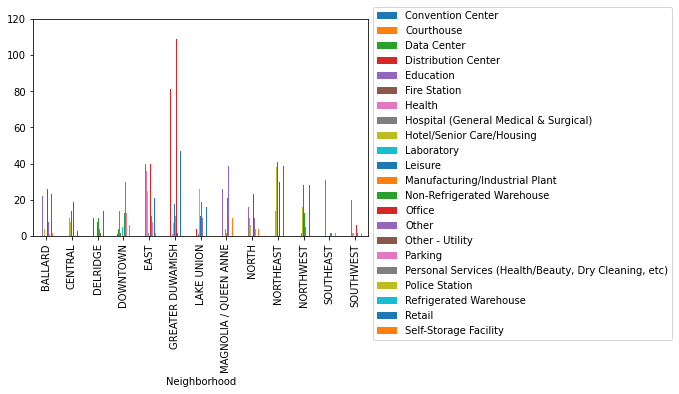

In [37]:
# Barchart contengency table
cont.plot(kind='bar')
plt.ylim(0, 120)
plt.legend(bbox_to_anchor=(1, -.5), loc='lower left', ncol=1)

In [38]:
# Khi2 test between nutriscore grade and pnns_goups_1
st_chi2, st_p, st_dof, st_exp = stats.chi2_contingency(cont)
print(st_p)

0.0


### Relation between building 'composition' variable 

In [39]:
# creation of contengency table
Y = "PrimaryPropertyType"
X = "LargestPropertyUseType"
cont = df[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
cont

PrimaryPropertyType,Distribution Center,Education,Health,Hospital,Hotel/Senior Care/Housing,Laboratory,Large Office,Leisure,Low-Rise Multifamily,Mixed Use Property,Non-Refrigerated Warehouse,Other,Refrigerated Warehouse,Residence Hall,Restaurant,Retail,Self-Storage Facility,Small- and Mid-Sized Office,Supermarket / Grocery Store,Warehouse
LargestPropertyUseType,,,,,,,,,,,,,,,,,,,,
Convention Center,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Courthouse,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
Data Center,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0
Distribution Center,103,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
Education,0,304,0,0,0,0,0,0,0,4,0,18,0,0,0,0,0,0,0,0
Fire Station,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
Health,0,0,75,0,0,0,0,0,0,4,0,16,0,0,0,0,0,0,0,0
Hospital (General Medical & Surgical),0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Hotel/Senior Care/Housing,0,0,0,0,190,0,0,0,5,22,0,12,0,21,0,0,0,0,0,0


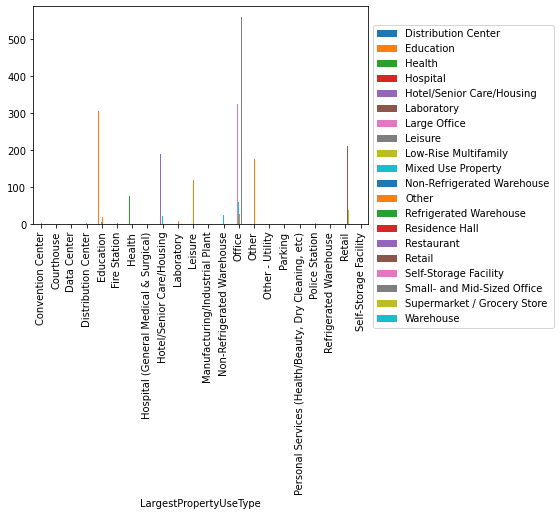

In [40]:
# Barchart contengency table
cont.plot(kind='bar')
plt.legend(bbox_to_anchor=(1, -.5), loc='lower left', ncol=1)

In [41]:
# Khi2 test between nutriscore grade and pnns_goups_1
st_chi2, st_p, st_dof, st_exp = stats.chi2_contingency(cont)
print(st_p)

0.0


All 'buildingType' features a correlated to each others

## Feature selection using sklearn

Finally I will keep all variable for features except OSEBuildings and Address which are unique and do a features selection using sklearn directly in the modeling notebook

## Dataset creation

In [42]:
df = df.drop(['OSEBuildingID', 'Address'], axis=1)

In [43]:
df.columns

Index(['DataYear', 'BuildingType', 'PrimaryPropertyType', 'ZipCode',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'median_SourceEUI(kBtu/sf)', 'median_SiteEUI(kBtu/sf)', 'p_NaturalGas',
       'p_Electricity', 'p_SteamUse'],
      dtype='object')

In [44]:
# Creation of the model selection dataframe

df.to_csv('data/DRV_seattleBuilding_full.csv', index=False)

In [45]:
# Manually selected dataset -> will not be use

df_select = df.loc[:, ['DataYear',
                       'NumberofBuildings',
                       'NumberofFloors',
                       'PropertyGFAParking',
                       'PropertyGFABuilding(s)',
                       'LargestPropertyUseTypeGFA',
                       'SecondLargestPropertyUseTypeGFA',
                       'median_SiteEUI(kBtu/sf)',
                       'p_SteamUse',
                       'p_Electricity',
                       'BuildingType',
                       'PrimaryPropertyType',
                       'CouncilDistrictCode',
                       'Neighborhood',
                       'YearBuilt',
                       'LargestPropertyUseType',
                       'SecondLargestPropertyUseType',
                       'ENERGYSTARScore',
                       'SiteEnergyUse(kBtu)',
                       'TotalGHGEmissions']]
df_select.to_csv('data/DRV_seattleBuilding.csv', index=False)